In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import psycopg2
import pandas.io.sql as sqlio
from scipy import stats

In [3]:
sys.path.append(os.path.abspath(os.path.join('../src')))

In [4]:
plt.style.use("https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle")

In [5]:
from preprocessing import PreProcess
from overview import Overview 
overview = Overview()
preProcess = PreProcess()
from plot import Plot
pl = Plot()
from outlier import Outlier
outlier = Outlier()

In [6]:
# Reading the cleaned data
df_clean = pd.read_csv('../data/cleaned_data.csv')

In [7]:
# slecting the numeric and categorical columns for outlier detection
numeric_columns = df_clean.select_dtypes(include=np.number).columns
categorical_columns = df_clean.select_dtypes(include='object').columns
dlist = ['bearer_id', 'start_ms', 'end_ms', 'imsi', 'msisdn/number', 'imei']
numeric_columns = [el for el in numeric_columns if el not in dlist]

In [8]:
# Relating the columns with their description for plot title 
col_description = pd.read_excel("../data/Field Descriptions.xlsx", index_col=False)
col_description["Fields"] = col_description["Fields"].apply(lambda x: x.replace(' ', '_').lower())

In [9]:
df_clean.head()

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,total_ul_(bytes),total_dl_(bytes),social_media,google,email,youtube,netflix,gaming,other,total_data
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,36749741.0,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,53800391.0,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,27883638.0,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,43324218.0,846028530.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,38542814.0,569138589.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0


In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 150001 non-null  float64
 1   start                                     150001 non-null  object 
 2   start_ms                                  150001 non-null  float64
 3   end                                       150001 non-null  object 
 4   end_ms                                    150001 non-null  float64
 5   dur._(ms)                                 150001 non-null  float64
 6   imsi                                      150001 non-null  float64
 7   msisdn/number                             150001 non-null  float64
 8   imei                                      150001 non-null  float64
 9   last_location_name                        150001 non-null  object 
 10  avg_rtt_dl_(ms)     

### Outlier Detection

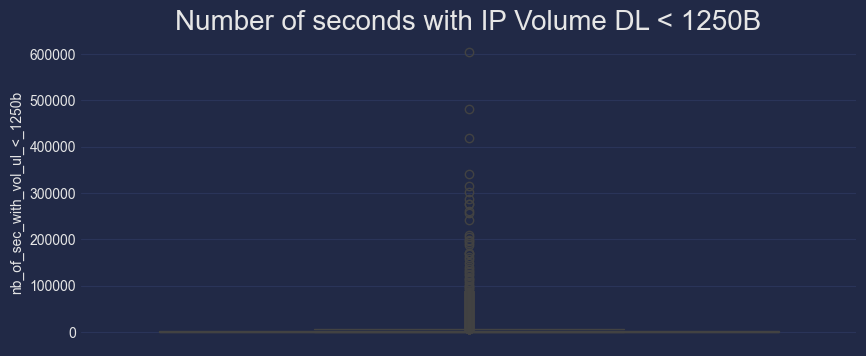

In [11]:
pl.plot_box(df_clean, 'nb_of_sec_with_vol_ul_<_1250b', 'Number of seconds with IP Volume DL < 1250B')

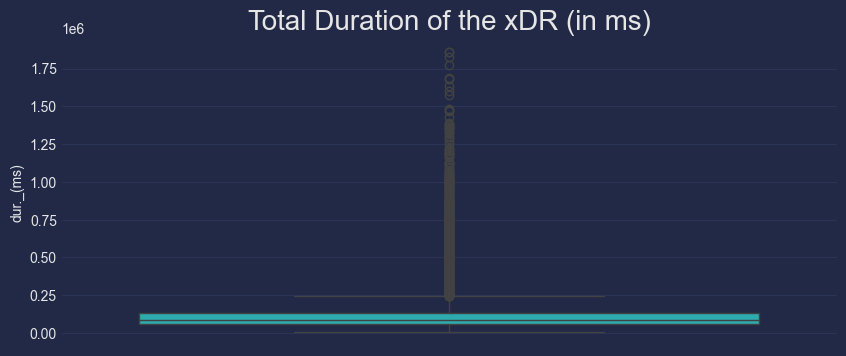

In [12]:
pl.plot_box(df_clean, 'dur._(ms)', 'Total Duration of the xDR (in ms)')

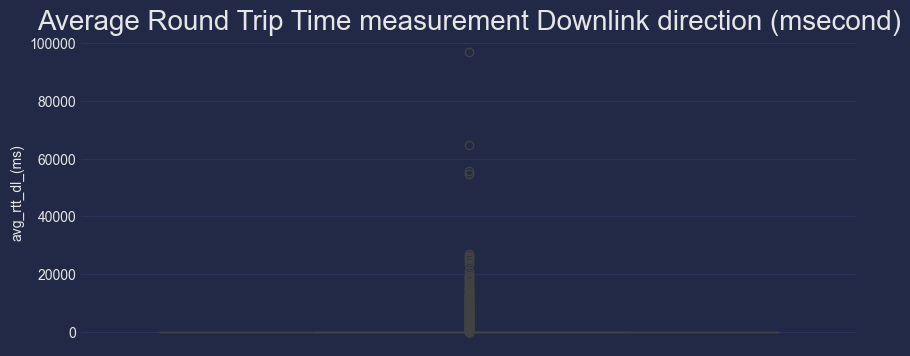

In [13]:
pl.plot_box(df_clean, 'avg_rtt_dl_(ms)', 'Average Round Trip Time measurement Downlink direction (msecond)')

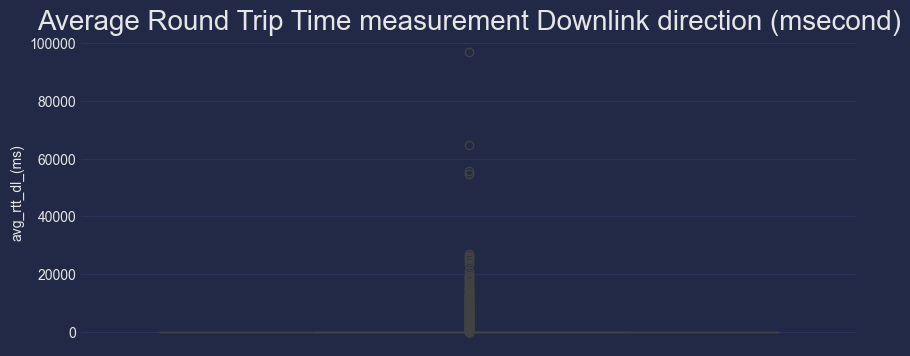

In [14]:
pl.plot_box(df_clean, 'avg_rtt_dl_(ms)', 'Average Round Trip Time measurement Downlink direction (msecond)')

In [15]:
display(outlier.outlier_overview(df_clean, 'activity_duration_ul_(ms)'))

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,total_ul_(bytes),total_dl_(bytes),social_media,google,email,youtube,netflix,gaming,other,total_data
38,7.277826e+18,4/18/2019 15:40,982.0,4/25/2019 15:40,33.0,604800.0,2.082095e+14,3.376394e+10,8.616400e+13,T86868A,...,49727524.0,267689014.0,2289164.0,6968427.0,3695834.0,38187388.0,29681520.0,224511685.0,307407730.0,317416538.0
538,7.277826e+18,4/23/2019 23:45,419.0,4/24/2019 23:45,313.0,86399.0,2.082017e+14,3.366726e+10,8.637690e+13,D84798A,...,36072646.0,236941106.0,59893.0,11310981.0,3416872.0,22114141.0,19928600.0,206991579.0,50676948.0,273013752.0
557,1.304243e+19,4/23/2019 23:56,766.0,4/24/2019 23:56,385.0,86400.0,2.082017e+14,3.366344e+10,8.637690e+13,D83916A,...,29908196.0,642815619.0,1327791.0,7856235.0,3824288.0,32149459.0,15464300.0,608015977.0,232625154.0,672723815.0
635,1.304243e+19,4/24/2019 0:09,773.0,4/25/2019 0:09,678.0,86399.0,2.082015e+14,3.366045e+10,8.637690e+13,D92712B,...,64954877.0,727897527.0,2728868.0,9731639.0,297957.0,36350335.0,26796840.0,702026210.0,56357265.0,792852404.0
655,7.277826e+18,4/24/2019 0:11,540.0,4/25/2019 0:11,513.0,86399.0,2.082017e+14,3.365830e+10,3.520271e+13,K14666C,...,42450423.0,632356629.0,3232621.0,13832461.0,1593857.0,6442885.0,9825074.0,630092914.0,245490618.0,674807052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148359,1.304243e+19,4/29/2019 7:08,248.0,4/30/2019 7:08,208.0,86399.0,2.082014e+14,3.366916e+10,8.637690e+13,T85713B,...,59572655.0,419875450.0,2152719.0,10395848.0,1456603.0,25229155.0,26845633.0,401863117.0,341357023.0,479448105.0
148408,1.304243e+19,4/29/2019 7:09,731.0,4/30/2019 7:09,745.0,86400.0,2.082017e+14,3.366057e+10,8.637690e+13,T85784A,...,44841066.0,579178272.0,3580949.0,8644318.0,3483958.0,13622092.0,43983326.0,534598296.0,33817072.0,624019338.0
148994,1.304243e+19,4/29/2019 7:16,675.0,4/30/2019 7:16,689.0,86400.0,2.082018e+14,3.366725e+10,8.637690e+13,D85941B,...,45124501.0,90680481.0,1801564.0,1421594.0,916167.0,36340337.0,17796819.0,77151179.0,772400034.0,135804982.0
148998,7.277826e+18,4/29/2019 7:16,452.0,4/30/2019 7:16,469.0,86400.0,2.082017e+14,3.376216e+10,8.637690e+13,T78199C,...,46062056.0,503379057.0,591475.0,9065039.0,3326554.0,35909436.0,26417933.0,471801222.0,332886430.0,549441113.0


It can be seen that most of the column have outliers

In [16]:
# outliers_dict = outlier.calculate_num_outliers_zscore(df, num_cols)
for col in numeric_columns:
    sample_outliers = outlier.calculate_num_outliers_zscore(df_clean[col])
    print(f"Outliers from Z-scores method of {col}", len(sample_outliers))

Outliers from Z-scores method of dur._(ms) 2214
Outliers from Z-scores method of avg_rtt_dl_(ms) 887
Outliers from Z-scores method of avg_rtt_ul_(ms) 950
Outliers from Z-scores method of avg_bearer_tp_dl_(kbps) 2983
Outliers from Z-scores method of avg_bearer_tp_ul_(kbps) 4269
Outliers from Z-scores method of tcp_dl_retrans._vol_(bytes) 1064
Outliers from Z-scores method of tcp_ul_retrans._vol_(bytes) 188
Outliers from Z-scores method of dl_tp_<_50_kbps_(%) 3469
Outliers from Z-scores method of 50_kbps_<_dl_tp_<_250_kbps_(%) 3466
Outliers from Z-scores method of 250_kbps_<_dl_tp_<_1_mbps_(%) 3151
Outliers from Z-scores method of dl_tp_>_1_mbps_(%) 3470
Outliers from Z-scores method of ul_tp_<_10_kbps_(%) 2212
Outliers from Z-scores method of 10_kbps_<_ul_tp_<_50_kbps_(%) 2026
Outliers from Z-scores method of 50_kbps_<_ul_tp_<_300_kbps_(%) 1039
Outliers from Z-scores method of ul_tp_>_300_kbps_(%) 758
Outliers from Z-scores method of http_dl_(bytes) 734
Outliers from Z-scores method of 

In [17]:
df_clean = outlier.handle_outliers(df_clean, numeric_columns)

/home/eyaya/Desktop/10_Academy/week_1/Week1_Challenge/User-Analytics-in-the-Telecom-Industry/src/outlier.py:39: RuntimeWarning: divide by zero encountered in log
  df[col] = [np.log(x) for x in df[col]]


In [18]:
# outliers_dict = outlier.calculate_num_outliers_zscore(df, num_cols)
for col in numeric_columns:
    sample_outliers = outlier.calculate_num_outliers_zscore(df_clean[col])
    print(f"Outliers from Z-scores method of {col}", len(sample_outliers))

Outliers from Z-scores method of dur._(ms) 500
Outliers from Z-scores method of avg_rtt_dl_(ms) 0


/home/eyaya/Desktop/10_Academy/week_1/Week1_Challenge/User-Analytics-in-the-Telecom-Industry/venv/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/eyaya/Desktop/10_Academy/week_1/Week1_Challenge/User-Analytics-in-the-Telecom-Industry/src/outlier.py:58: RuntimeWarning: invalid value encountered in scalar subtract
  z_score = (i-mean)/std


Outliers from Z-scores method of avg_rtt_ul_(ms) 0
Outliers from Z-scores method of avg_bearer_tp_dl_(kbps) 0
Outliers from Z-scores method of avg_bearer_tp_ul_(kbps) 0
Outliers from Z-scores method of tcp_dl_retrans._vol_(bytes) 686
Outliers from Z-scores method of tcp_ul_retrans._vol_(bytes) 1468
Outliers from Z-scores method of dl_tp_<_50_kbps_(%) 0
Outliers from Z-scores method of 50_kbps_<_dl_tp_<_250_kbps_(%) 0
Outliers from Z-scores method of 250_kbps_<_dl_tp_<_1_mbps_(%) 0
Outliers from Z-scores method of dl_tp_>_1_mbps_(%) 0
Outliers from Z-scores method of ul_tp_<_10_kbps_(%) 0
Outliers from Z-scores method of 10_kbps_<_ul_tp_<_50_kbps_(%) 0
Outliers from Z-scores method of 50_kbps_<_ul_tp_<_300_kbps_(%) 0
Outliers from Z-scores method of ul_tp_>_300_kbps_(%) 0
Outliers from Z-scores method of http_dl_(bytes) 511
Outliers from Z-scores method of http_ul_(bytes) 245
Outliers from Z-scores method of activity_duration_dl_(ms) 0
Outliers from Z-scores method of activity_duration_

In [19]:
columns_with_outliers = [col for col in numeric_columns if len(outlier.calculate_num_outliers_zscore(df_clean[col]))>0]

In [20]:
df_outlier = df_clean[columns_with_outliers]

In [21]:
df_outlier.shape

(150001, 35)

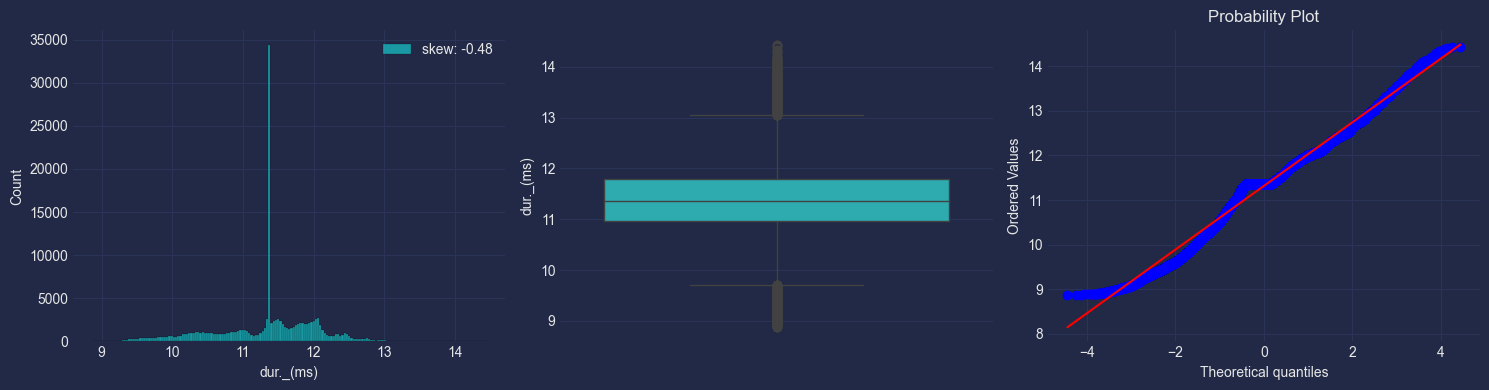

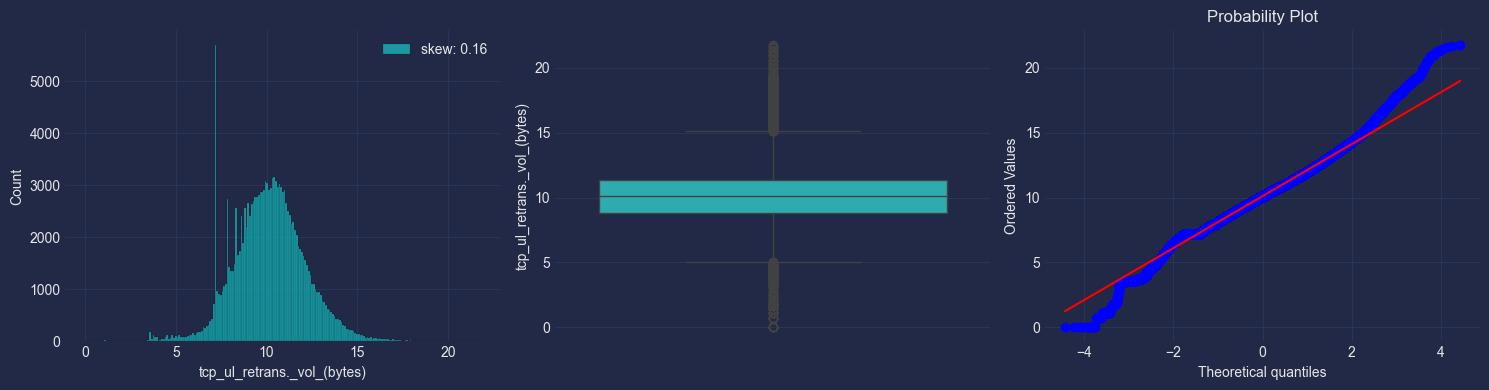

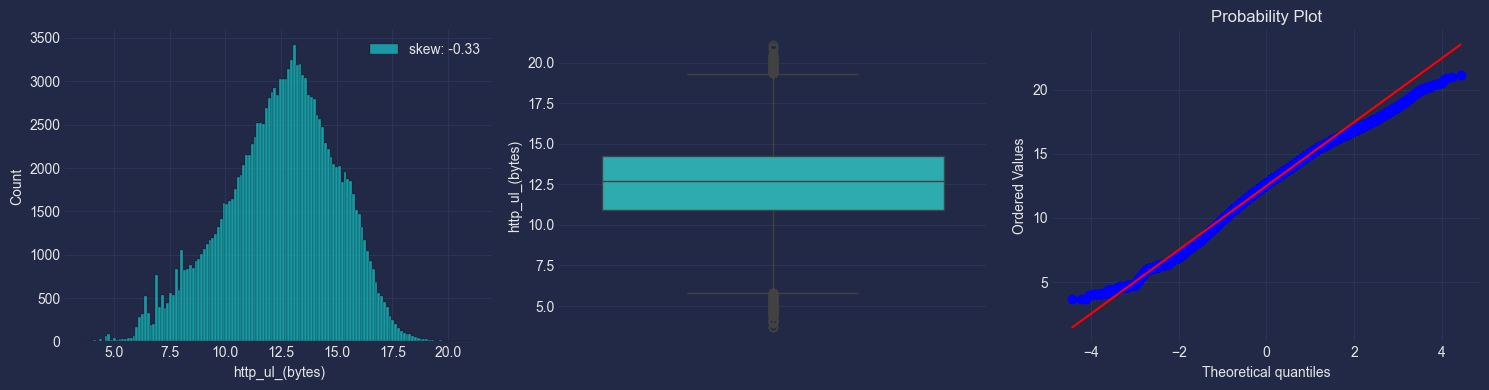

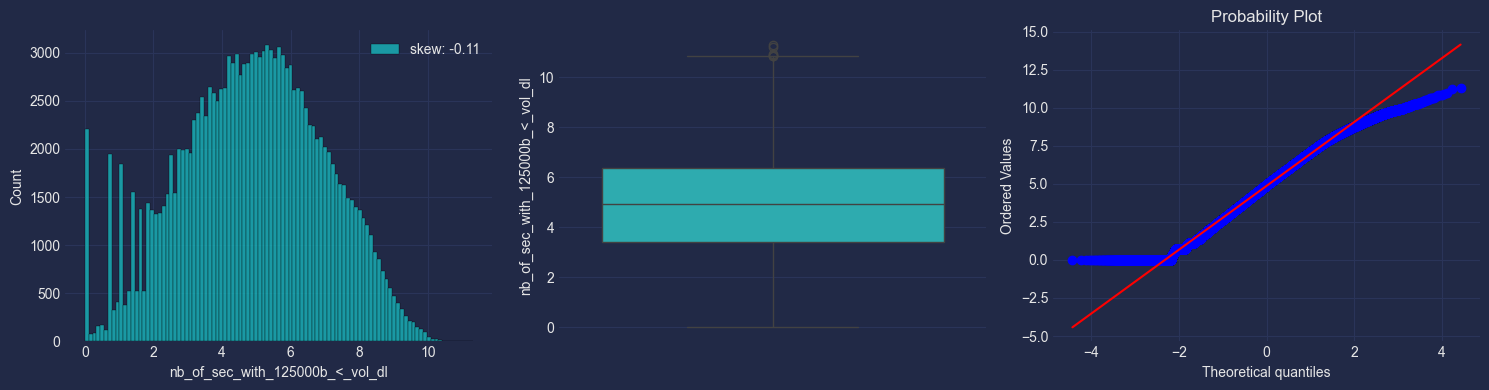

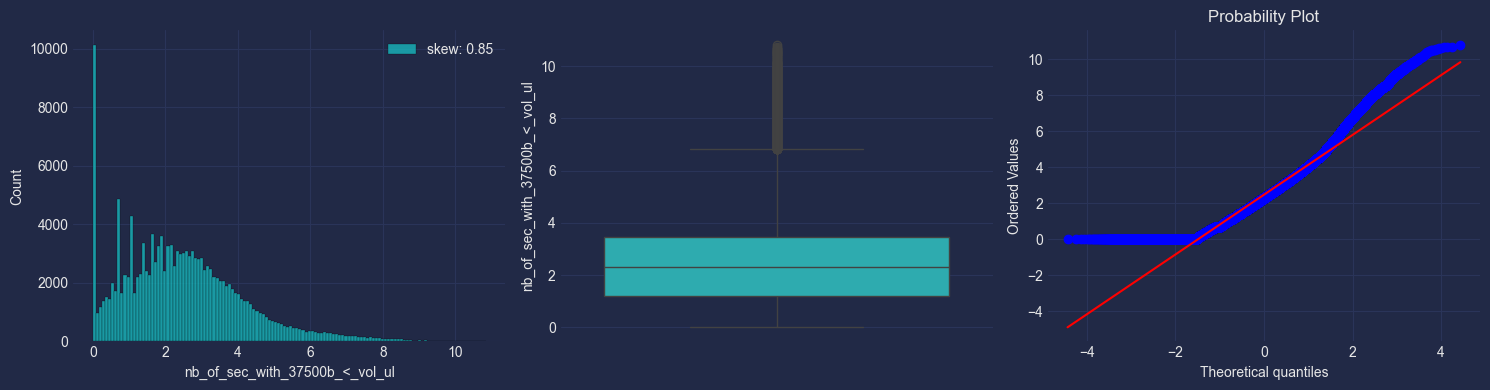

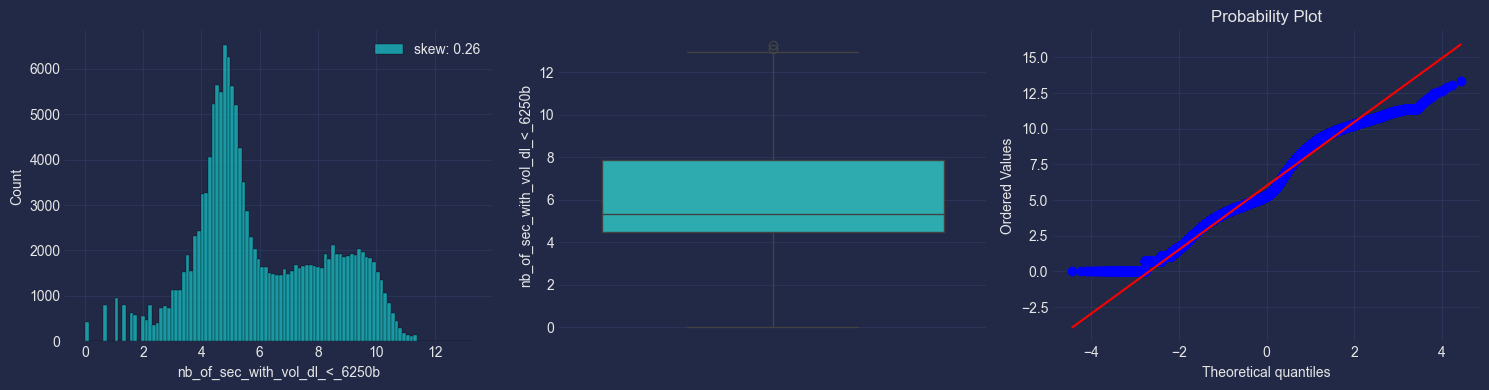

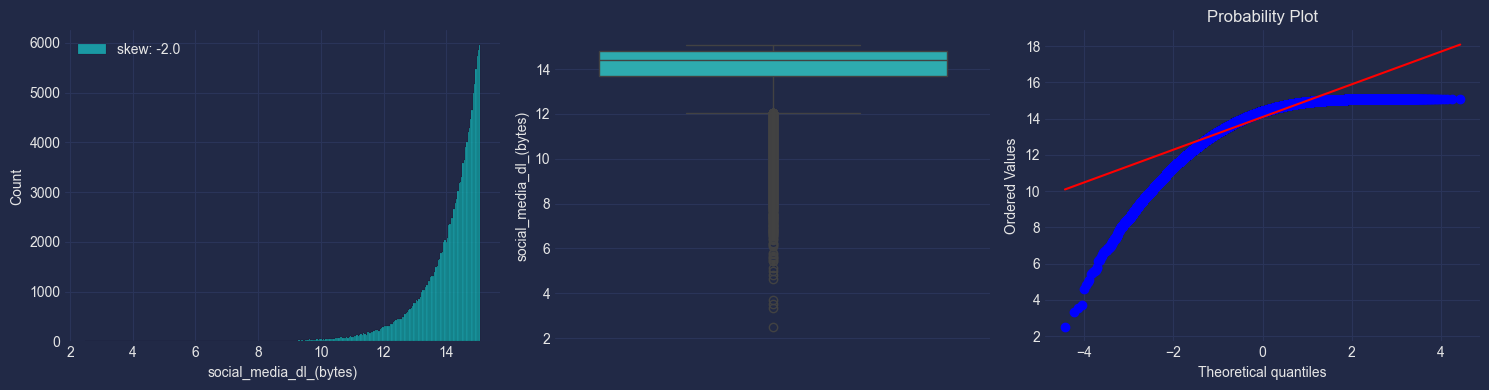

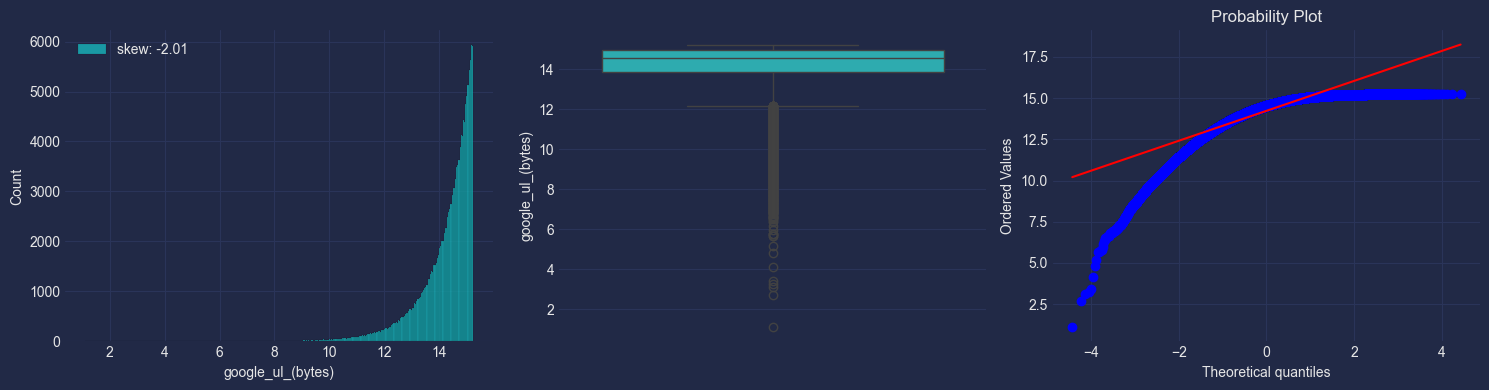

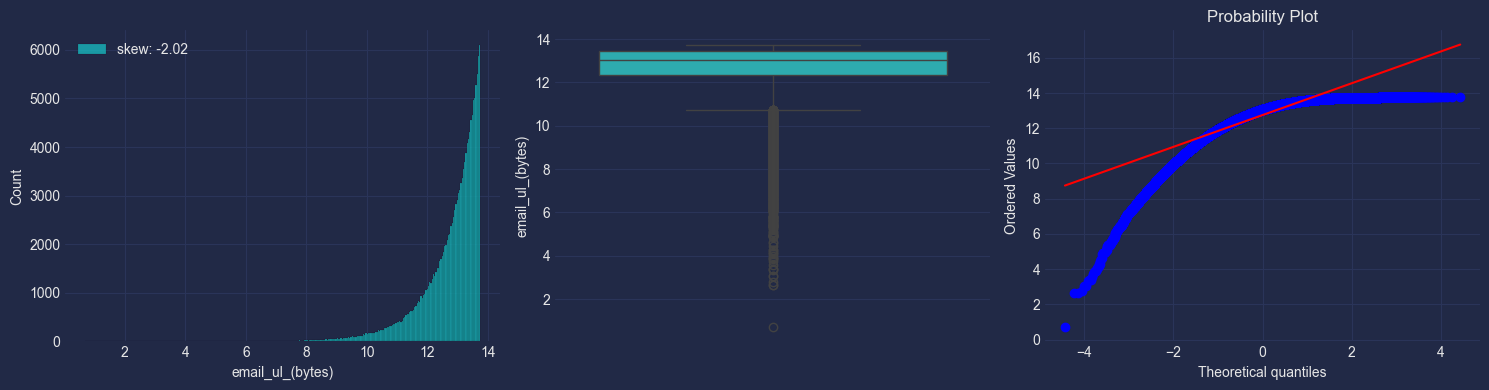

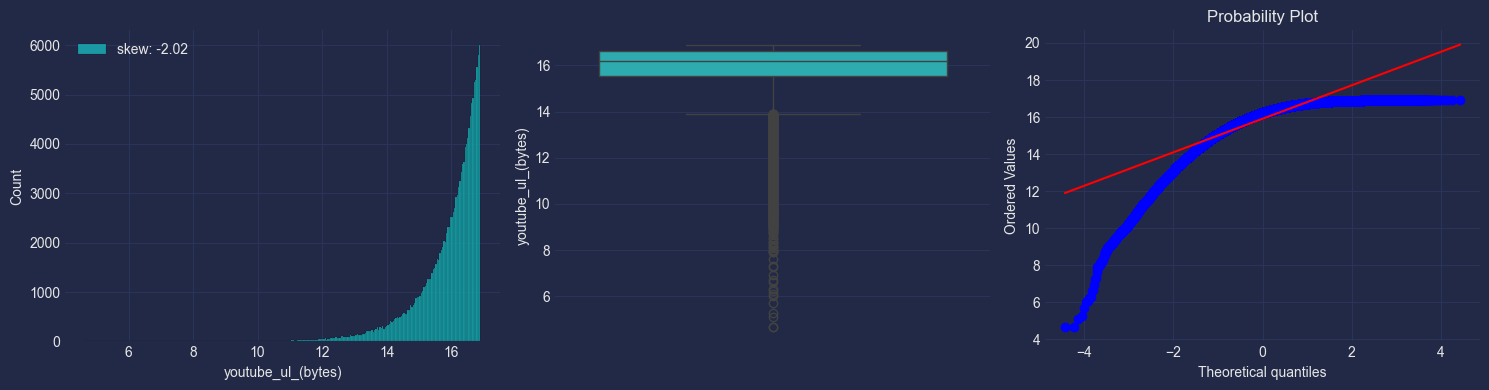

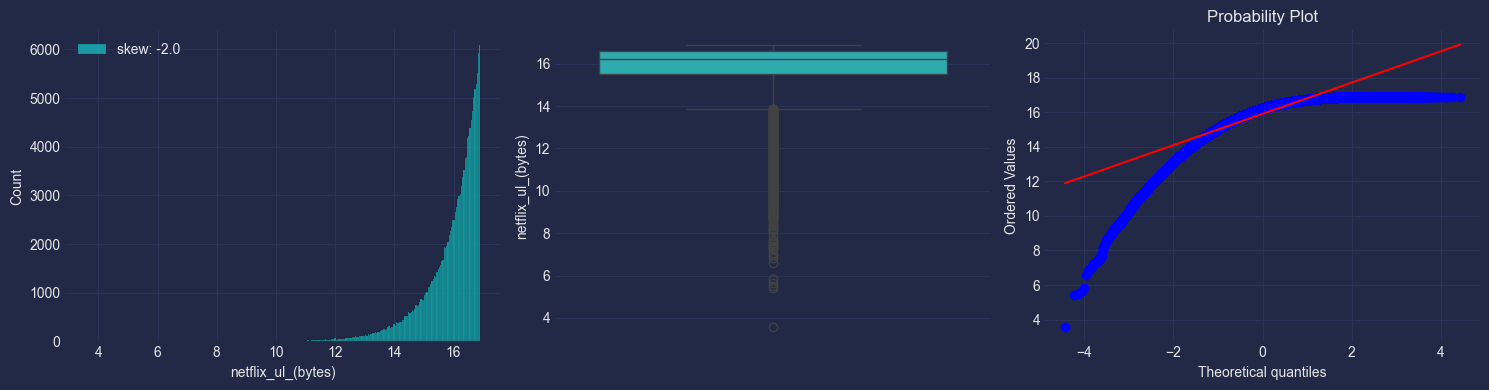

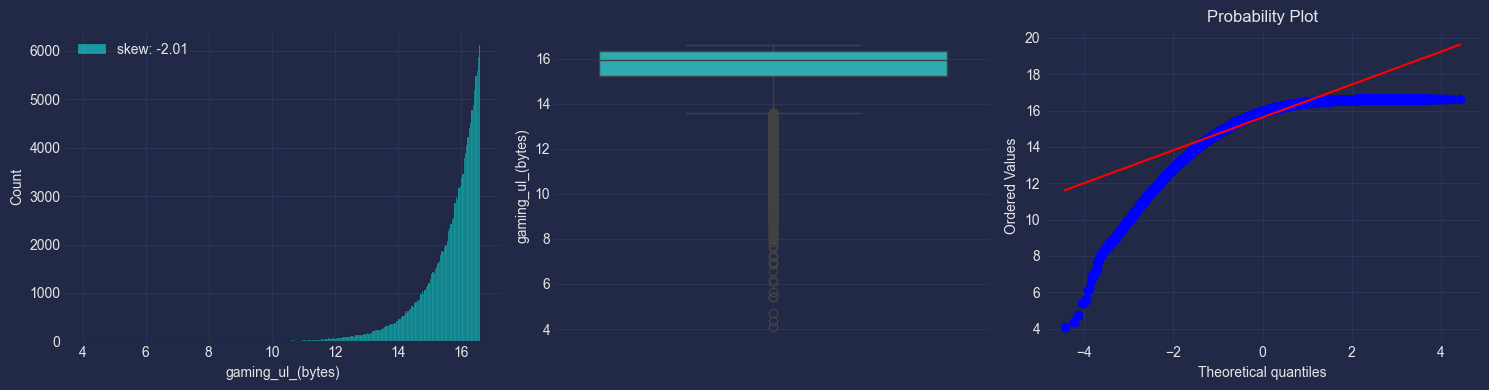

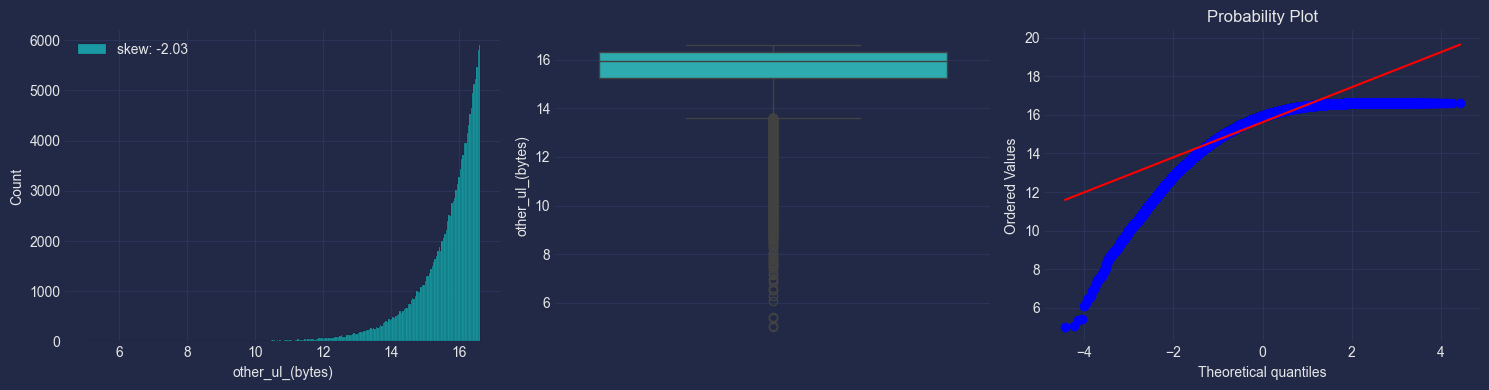

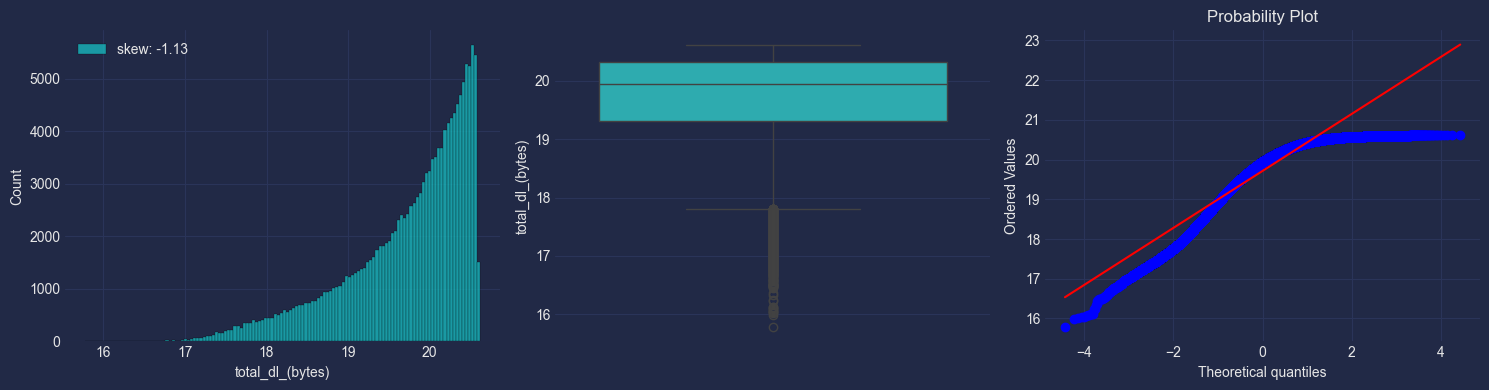

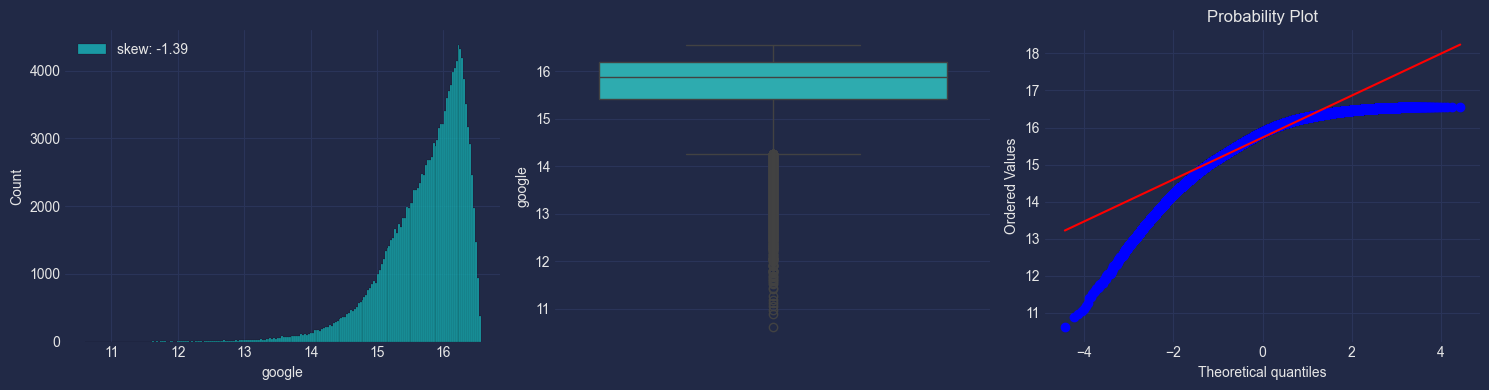

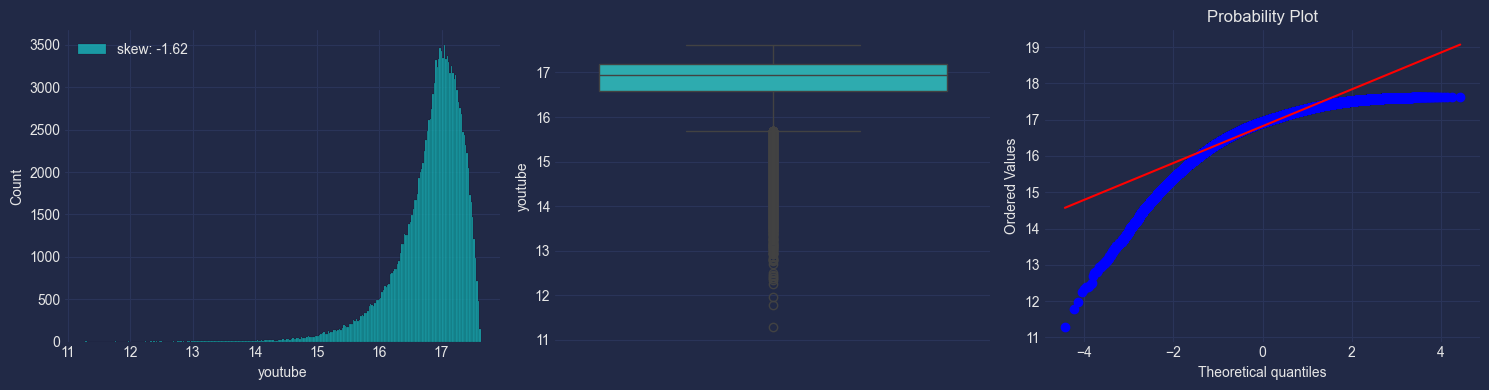

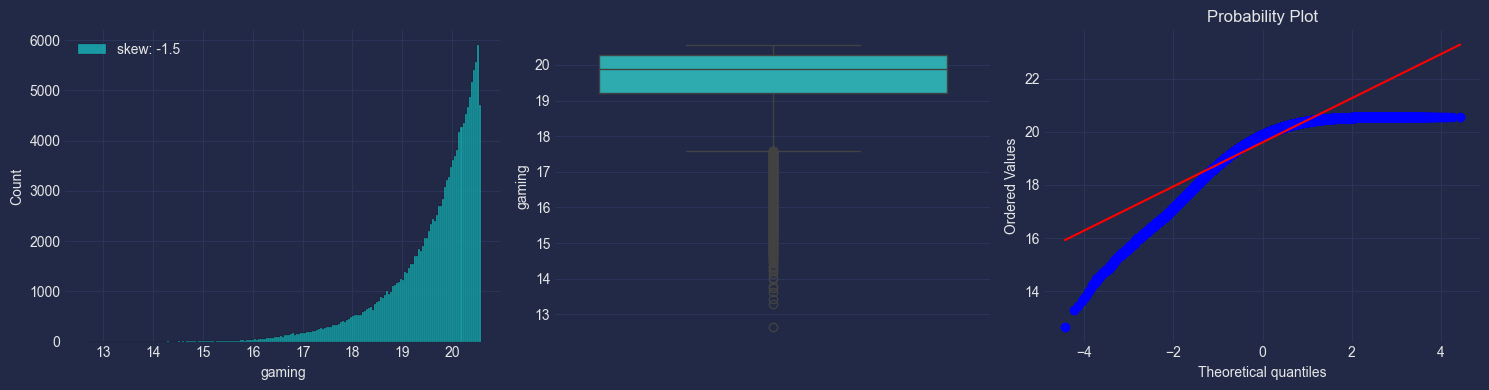

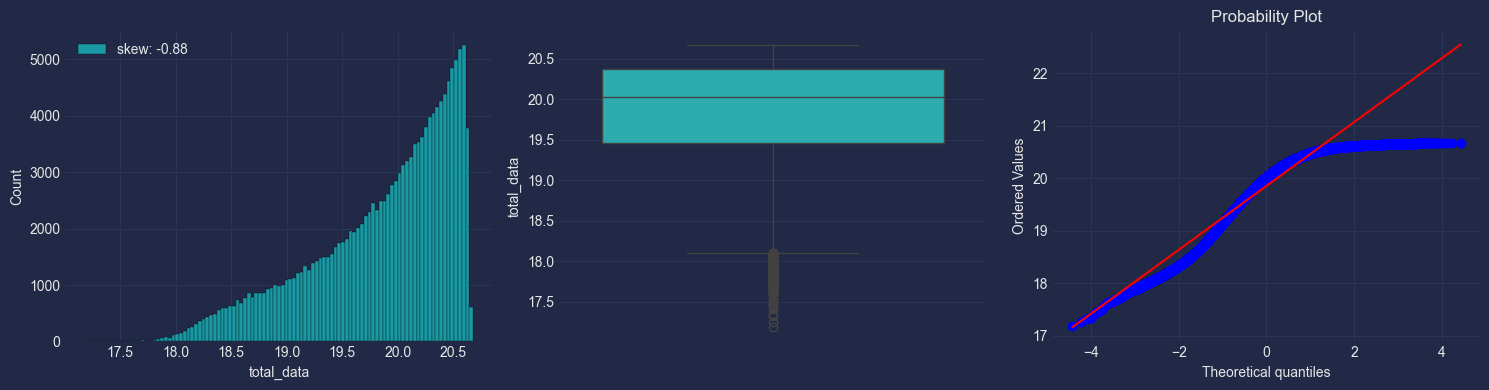

In [22]:
#sns.set_style('dark')
for i in range(0,len(columns_with_outliers),2):
    col = columns_with_outliers[i]
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.histplot(df_outlier[col], label="skew: " + str(np.round(df_outlier[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df_outlier[col])
    plt.subplot(133)
    stats.probplot(df_outlier[col], plot=plt)
    plt.tight_layout()
    plt.show()


The method of using Z scores for capping/ trimming the outliers is valid ONLY if the particular feature is normally distributed. Since most of the fetures in our data dataset are NOT normally distributed, we should use other techniques, one of which is this IQR method

In [23]:
## Capping

In [24]:
# Function to cap outliers using IQR method
def cap_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculating lower and upper bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping values beyond the lower and upper bounds
    capped_df = df.clip(lower=lower_bound, upper=upper_bound, axis=1)
    
    return capped_df


In [25]:
df_caped = cap_outliers_iqr(df_clean[numeric_columns])

/home/eyaya/Desktop/10_Academy/week_1/Week1_Challenge/User-Analytics-in-the-Telecom-Industry/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/eyaya/Desktop/10_Academy/week_1/Week1_Challenge/User-Analytics-in-the-Telecom-Industry/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [26]:
df_cap = df_caped[columns_with_outliers]

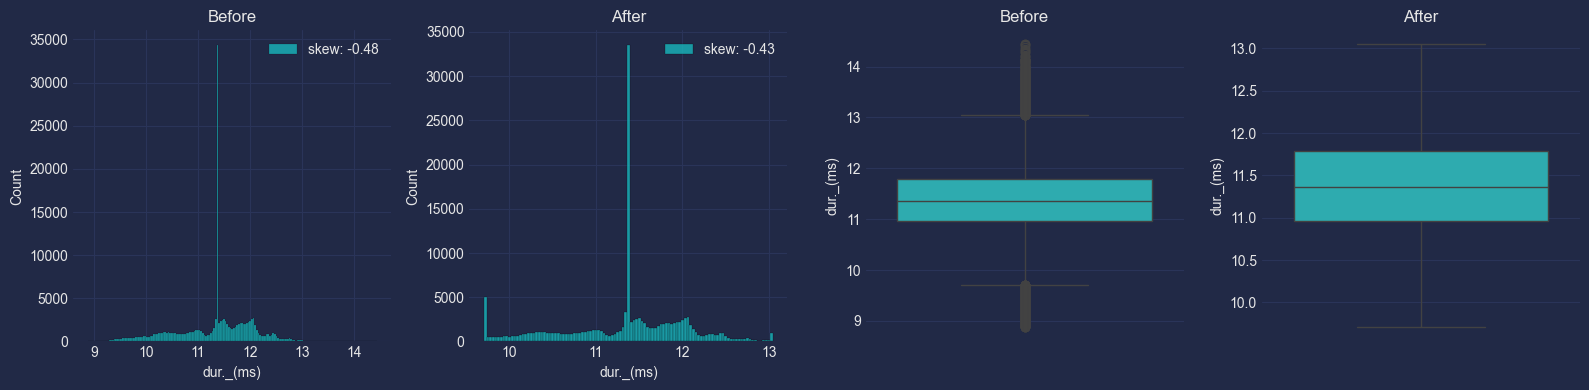

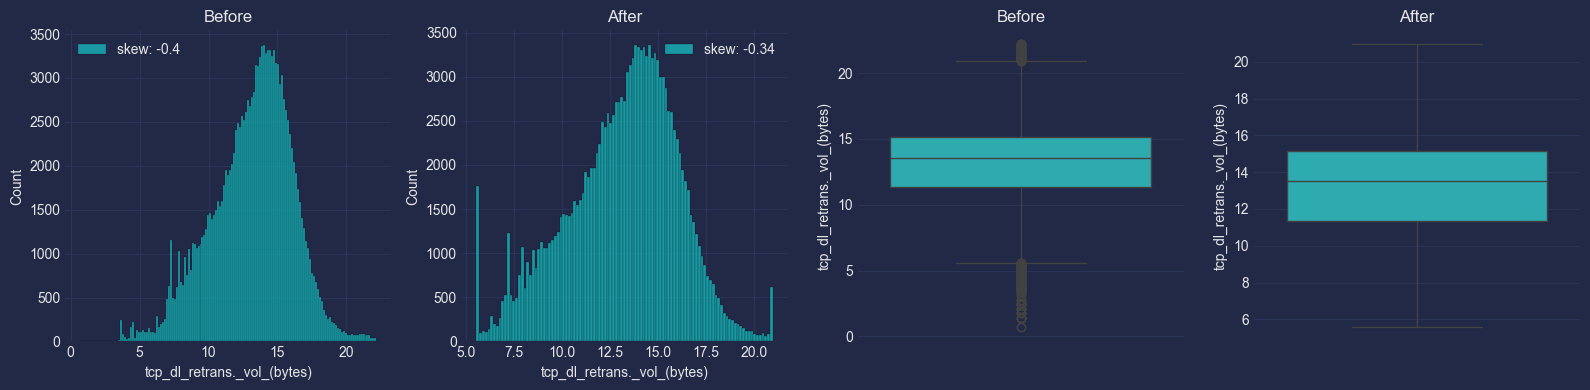

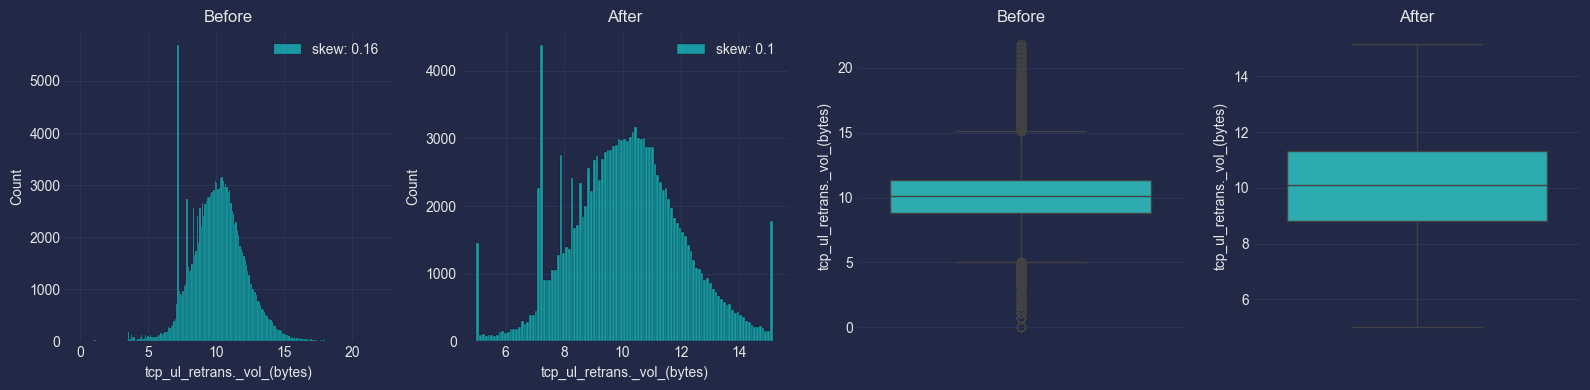

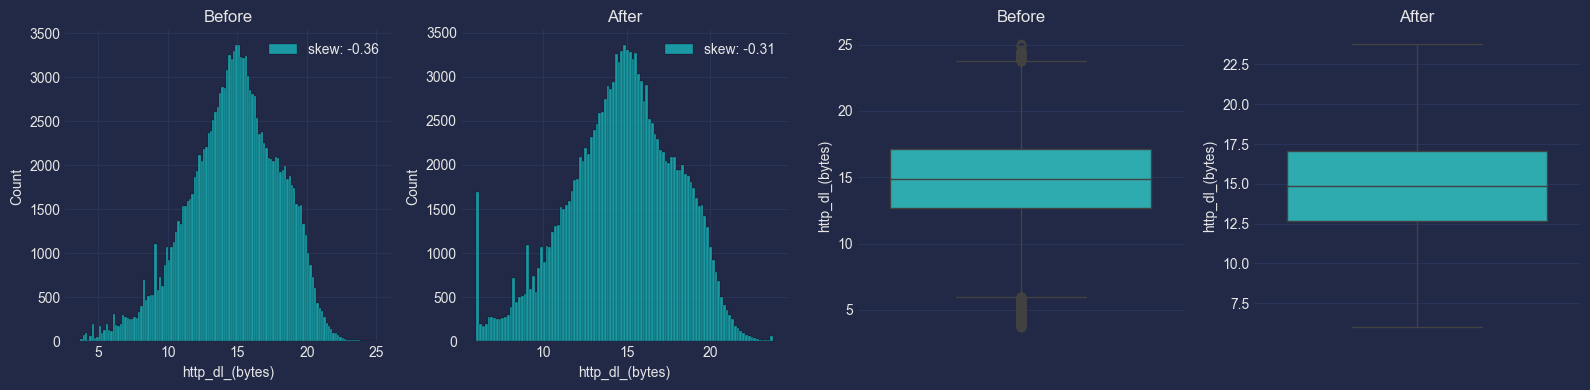

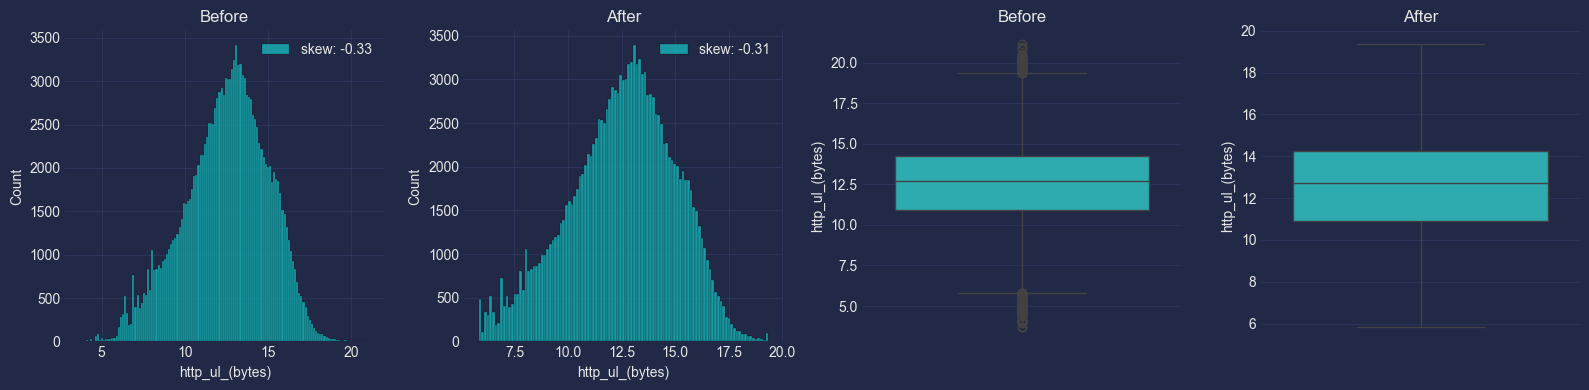

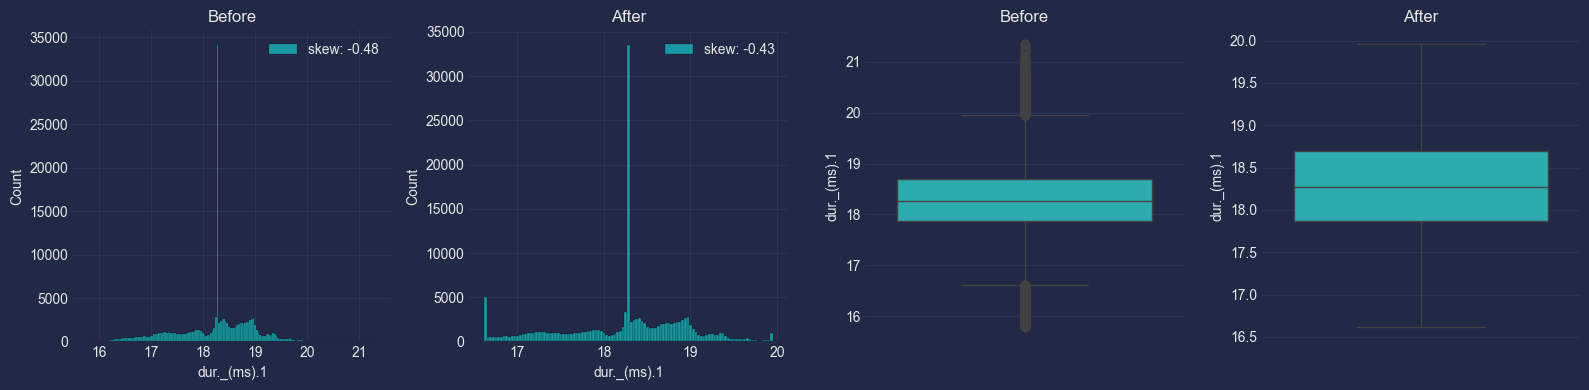

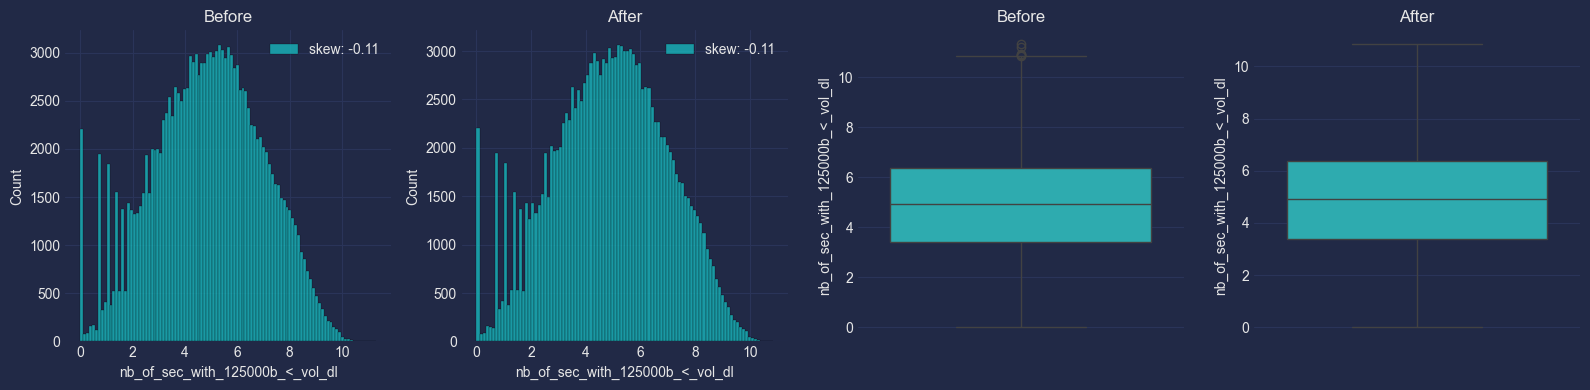

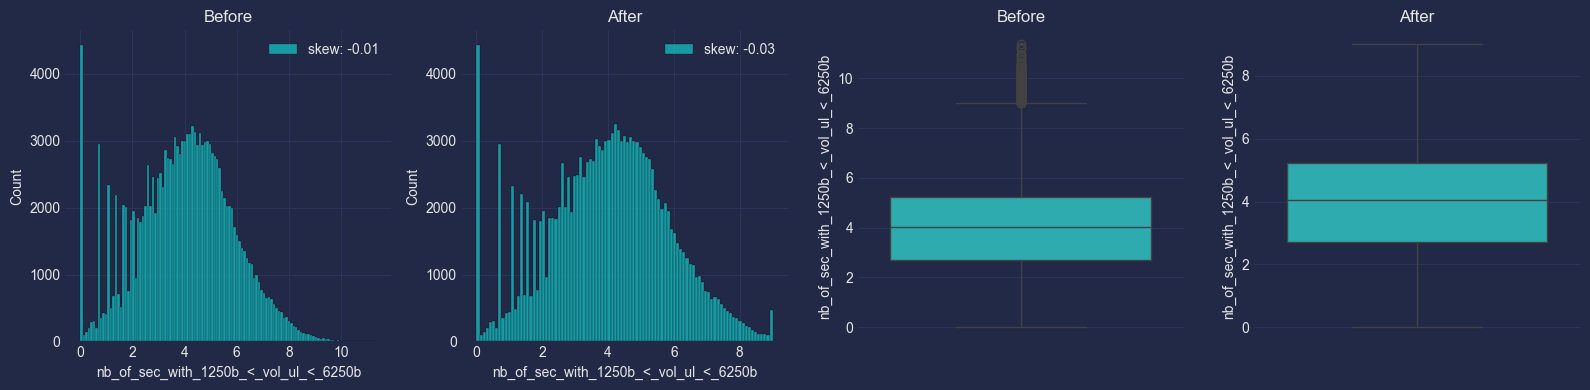

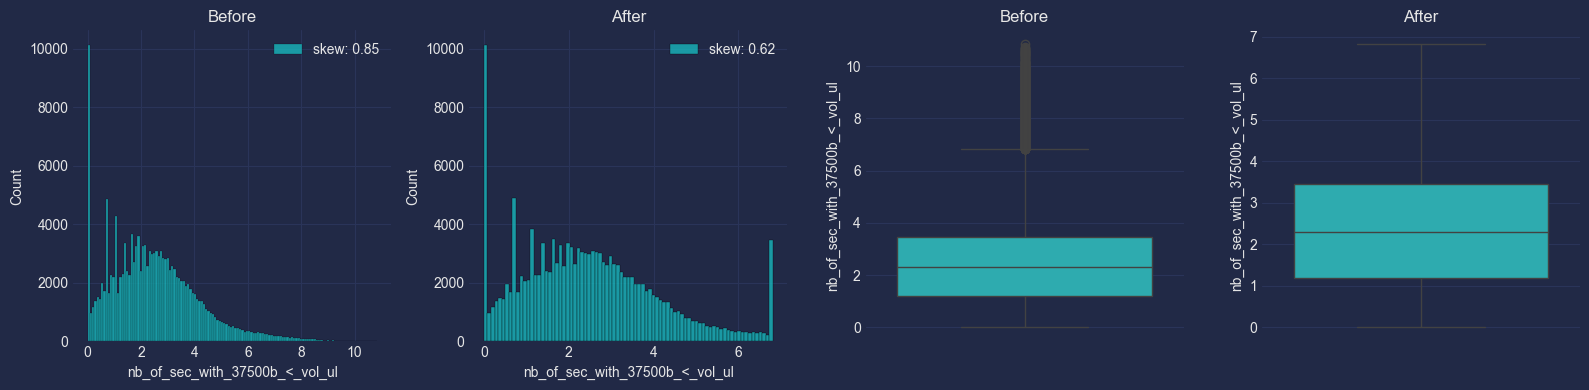

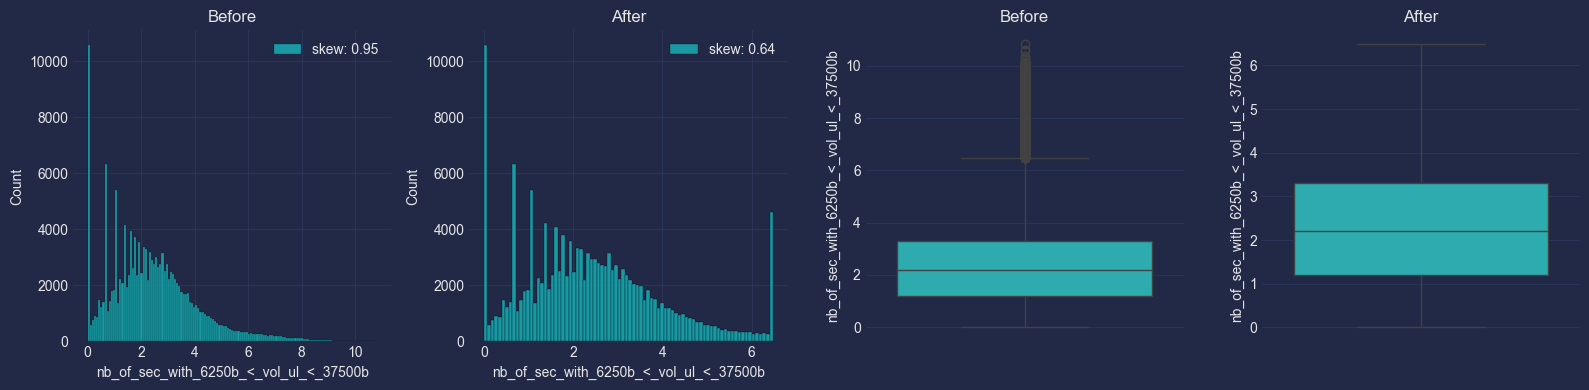

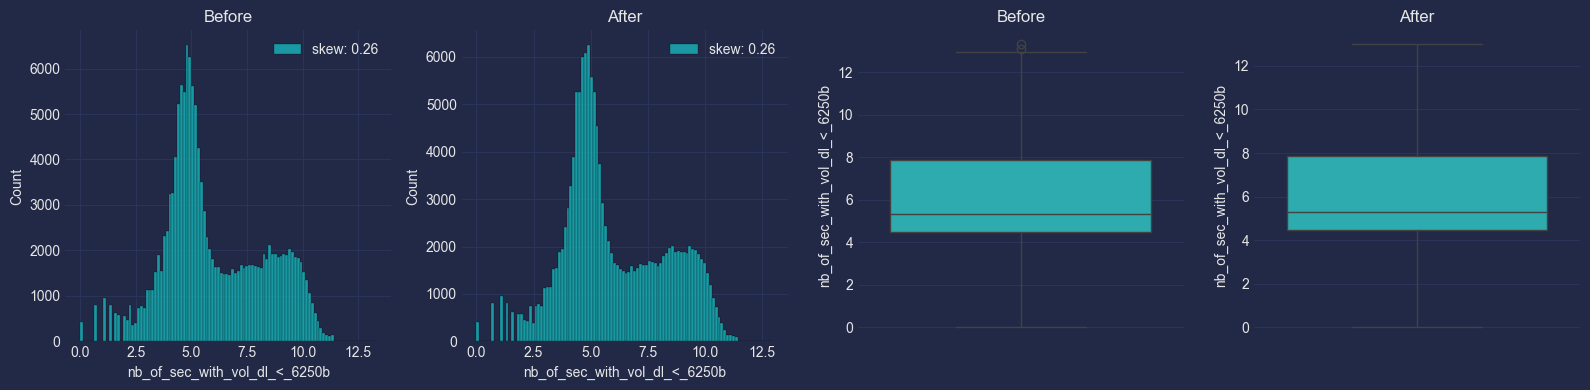

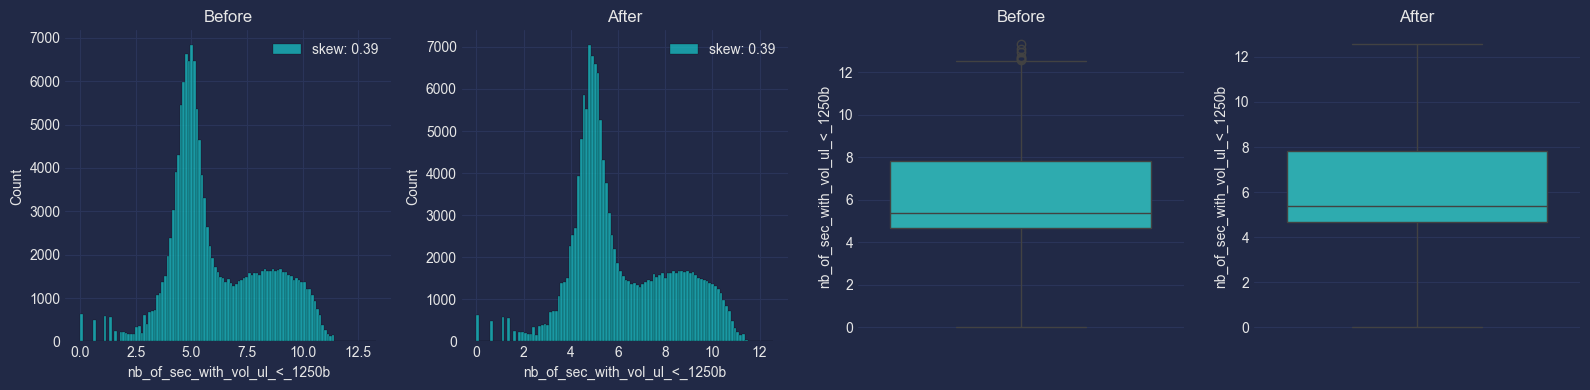

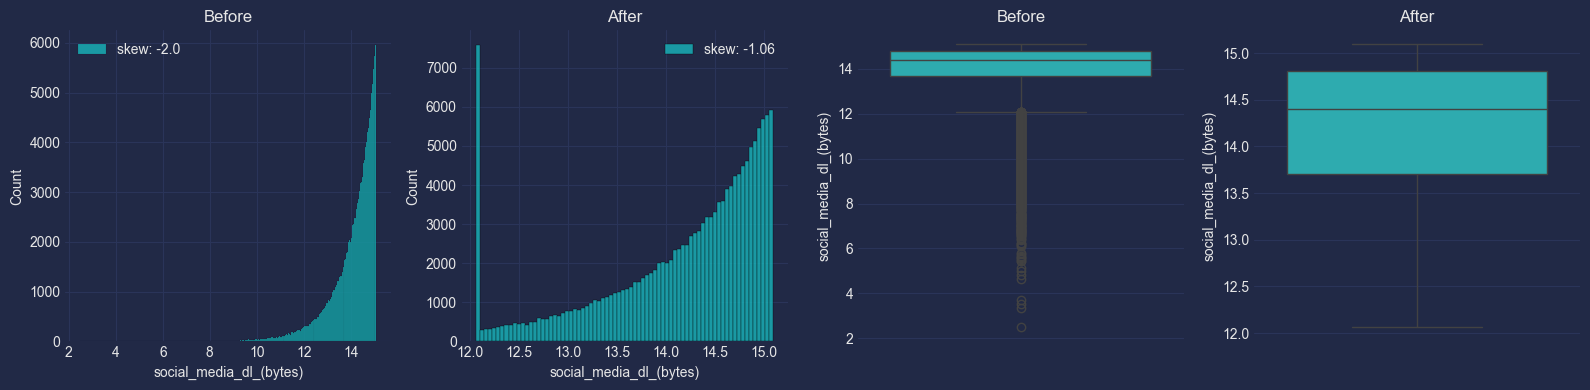

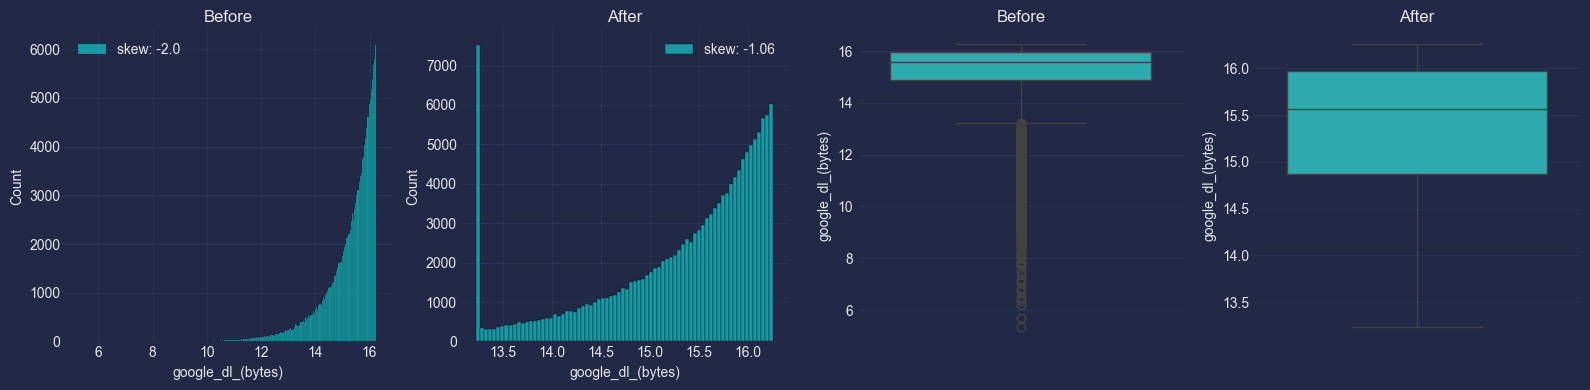

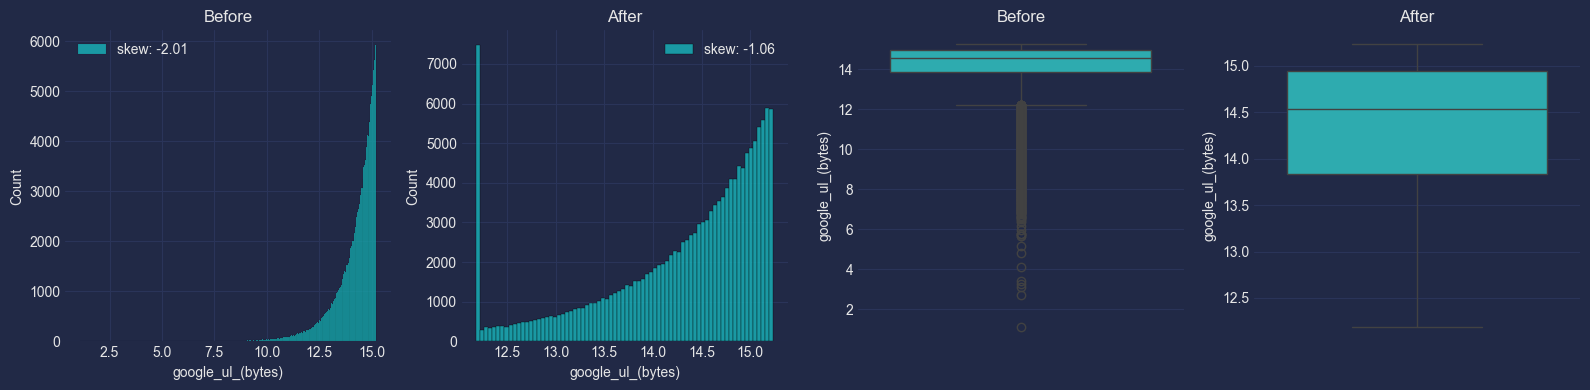

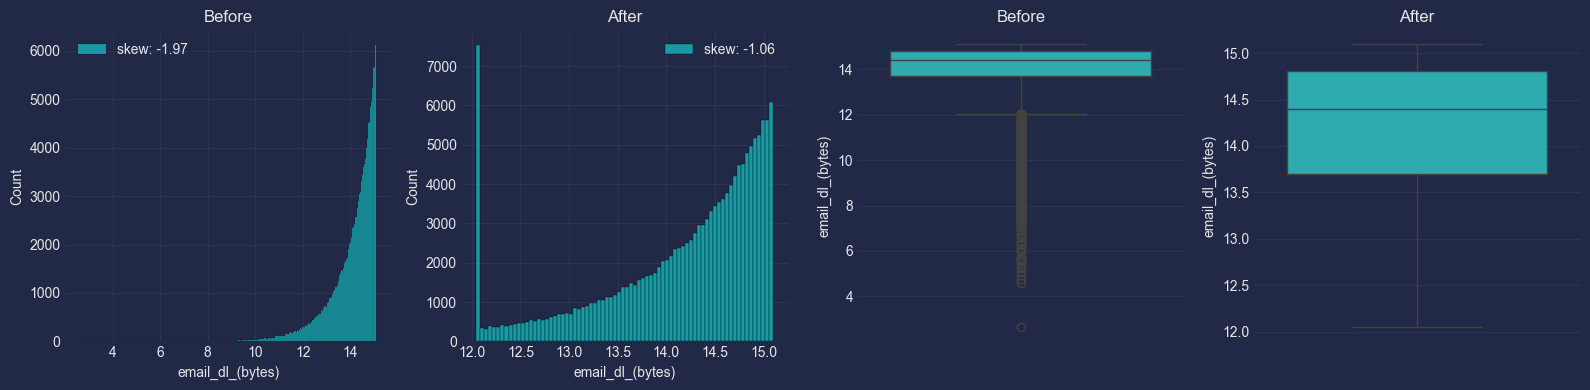

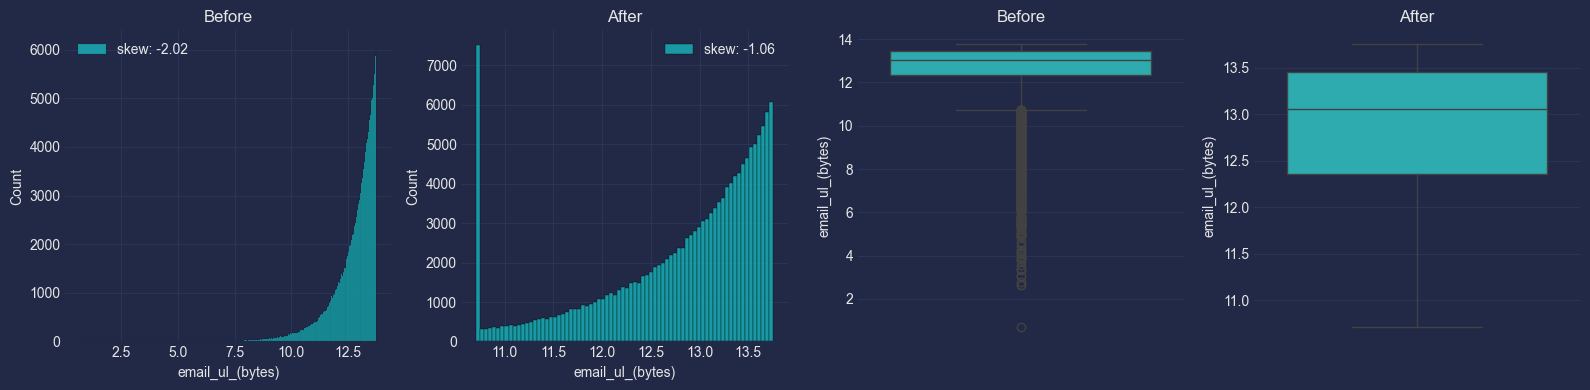

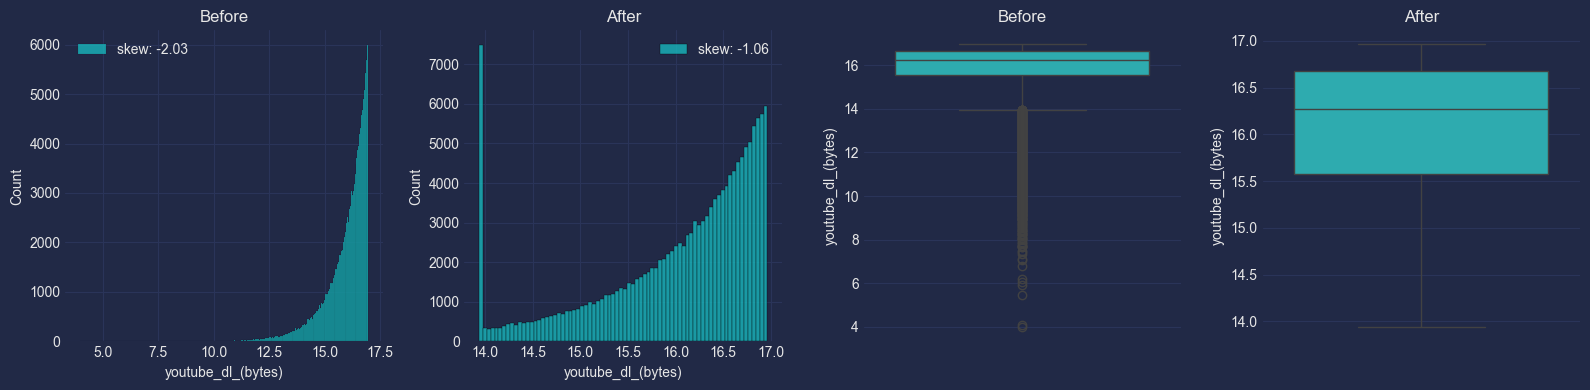

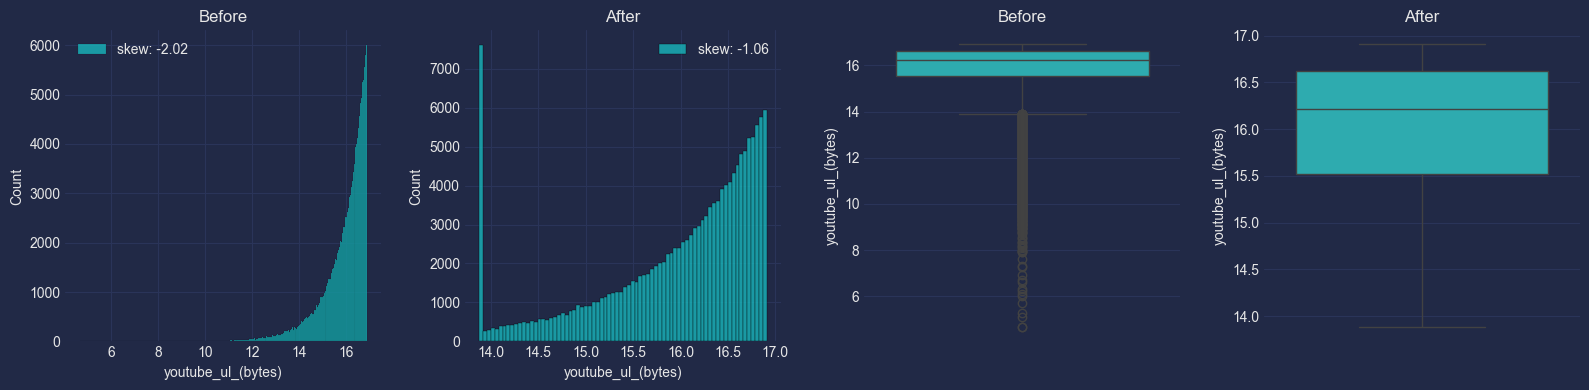

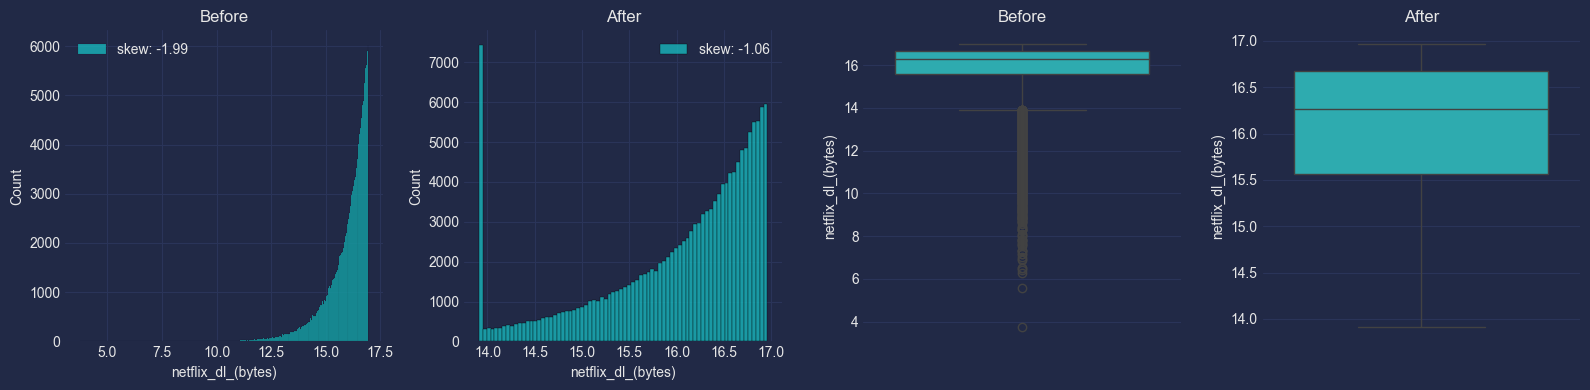

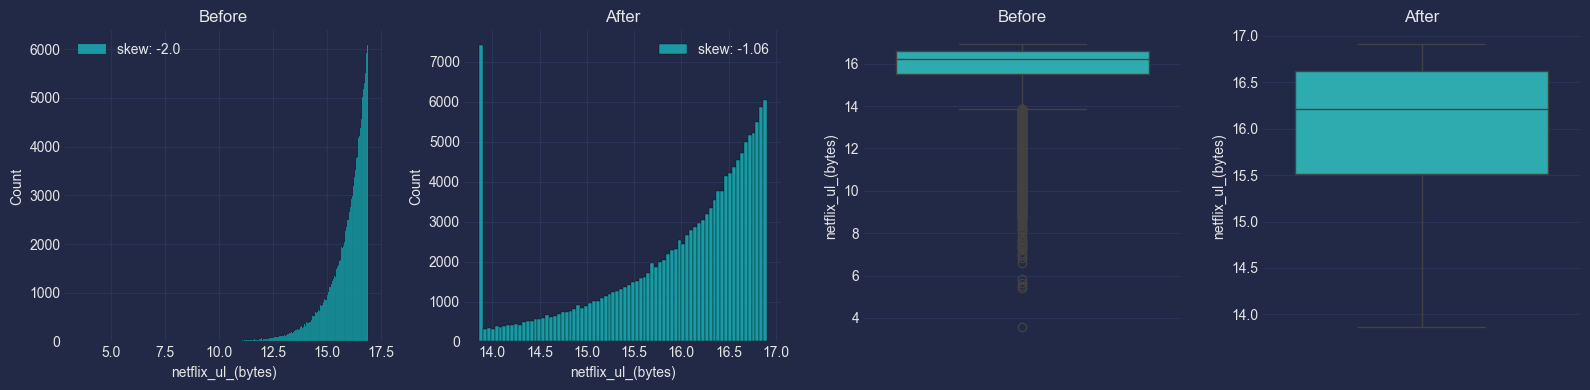

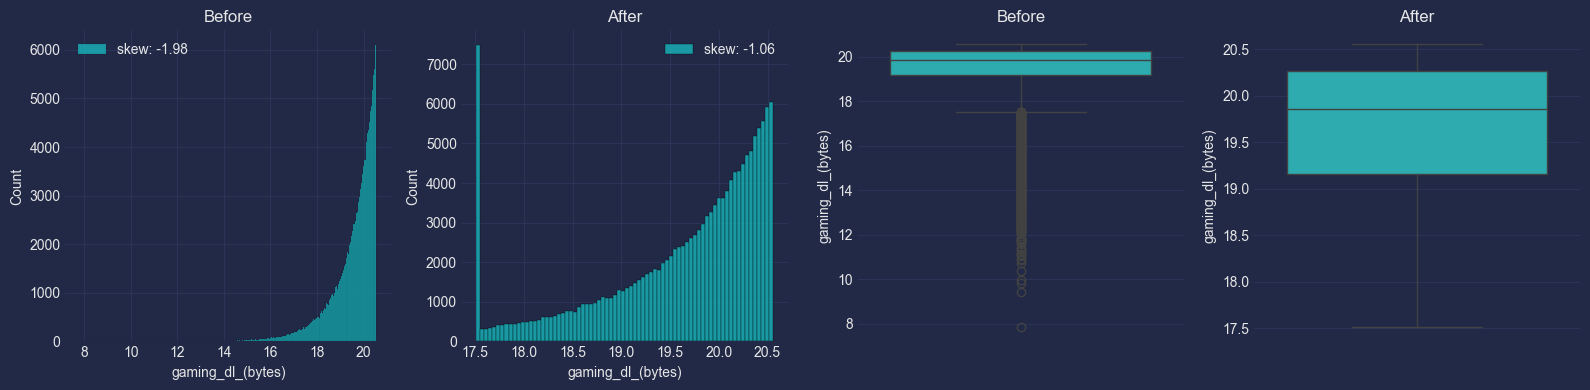

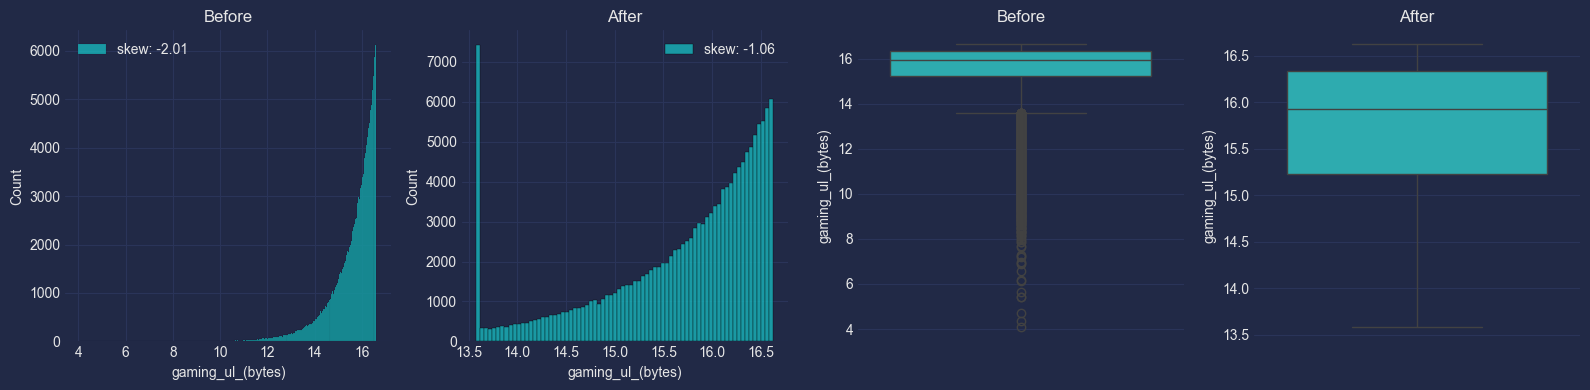

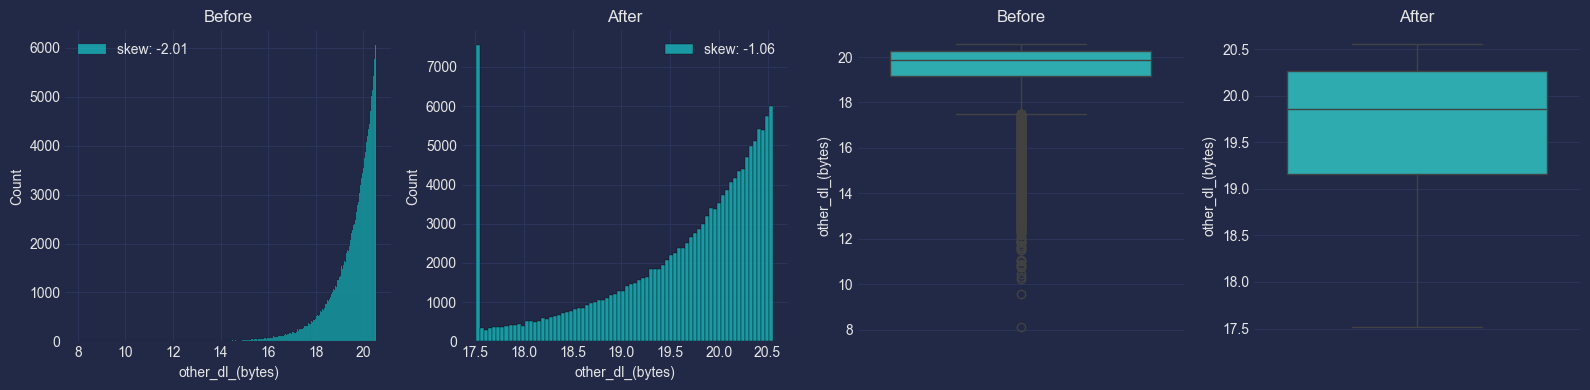

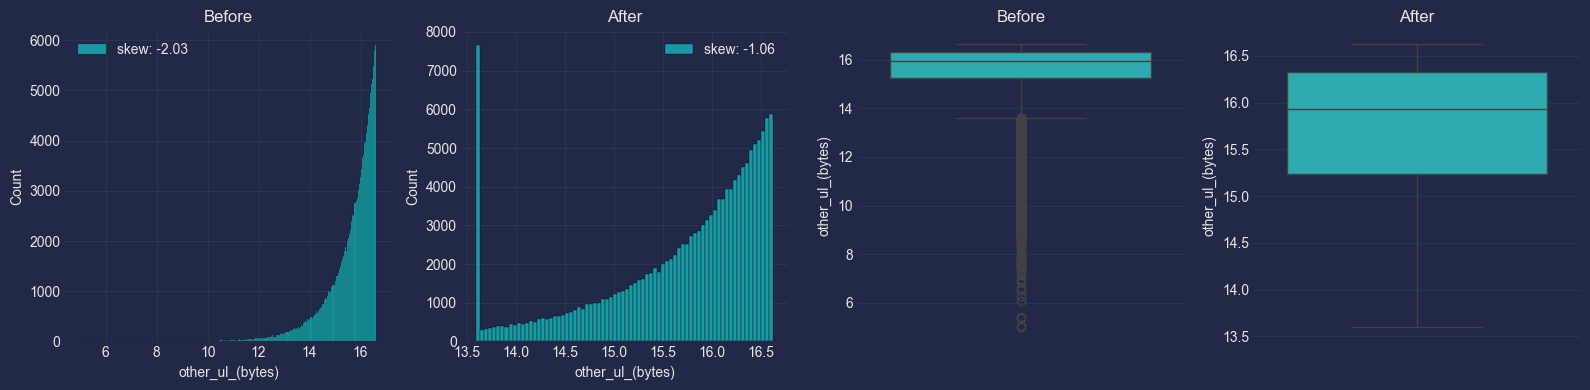

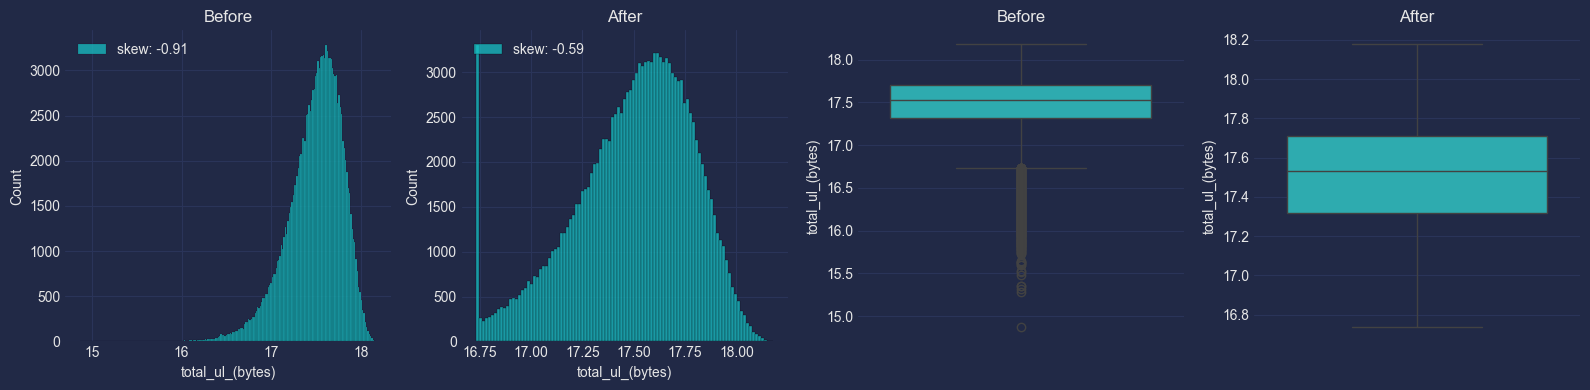

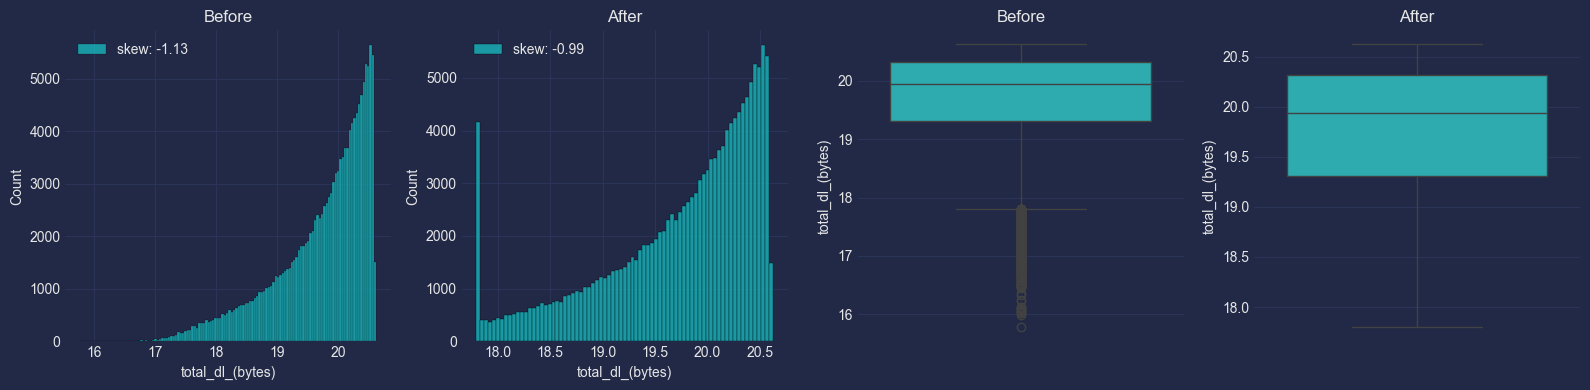

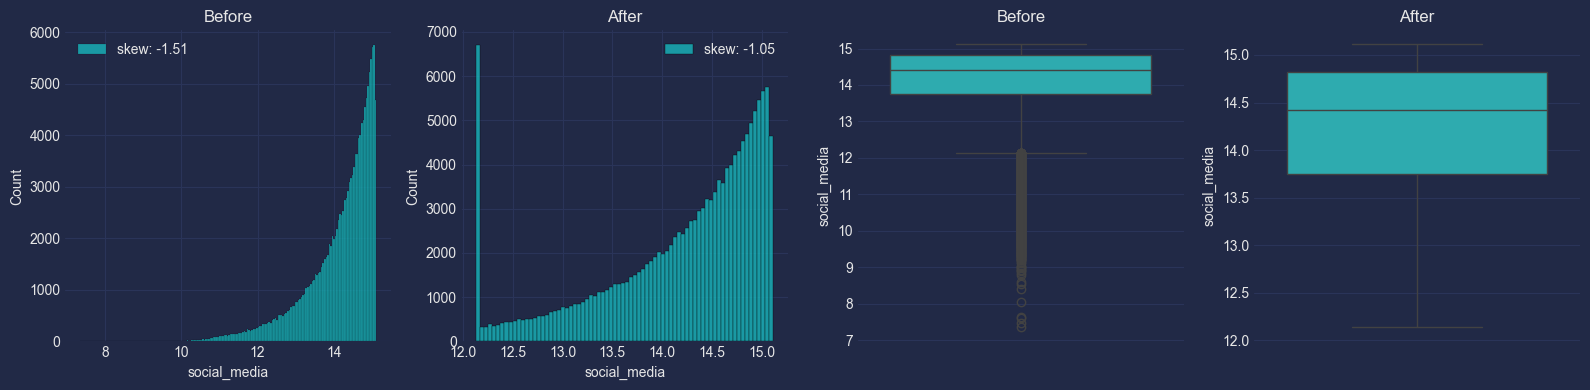

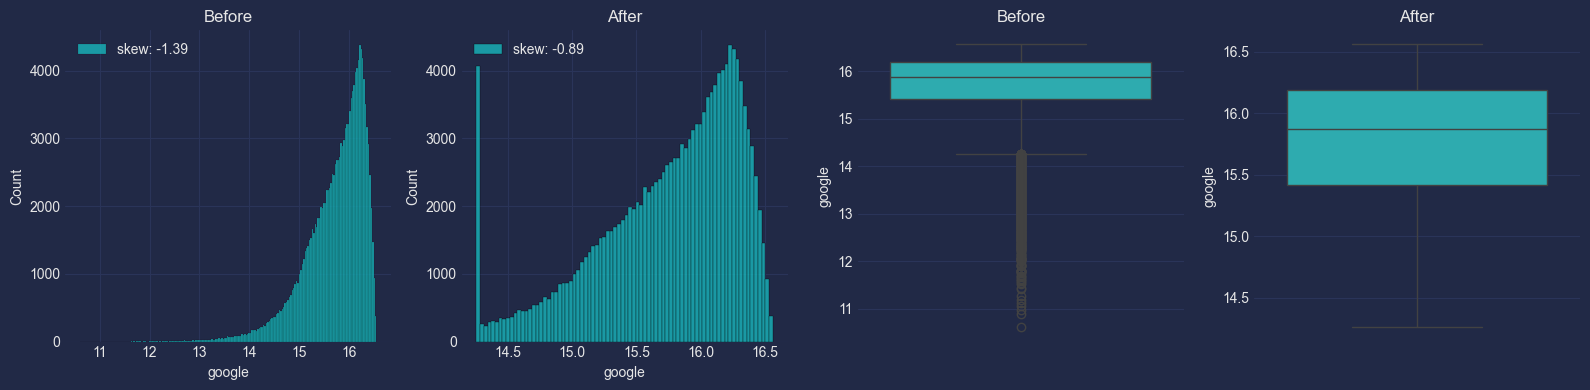

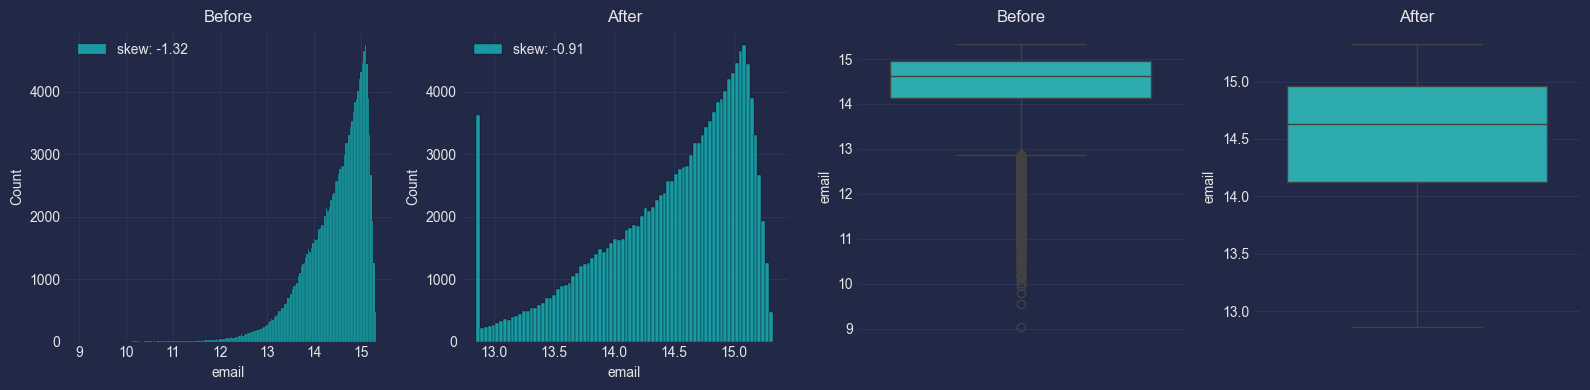

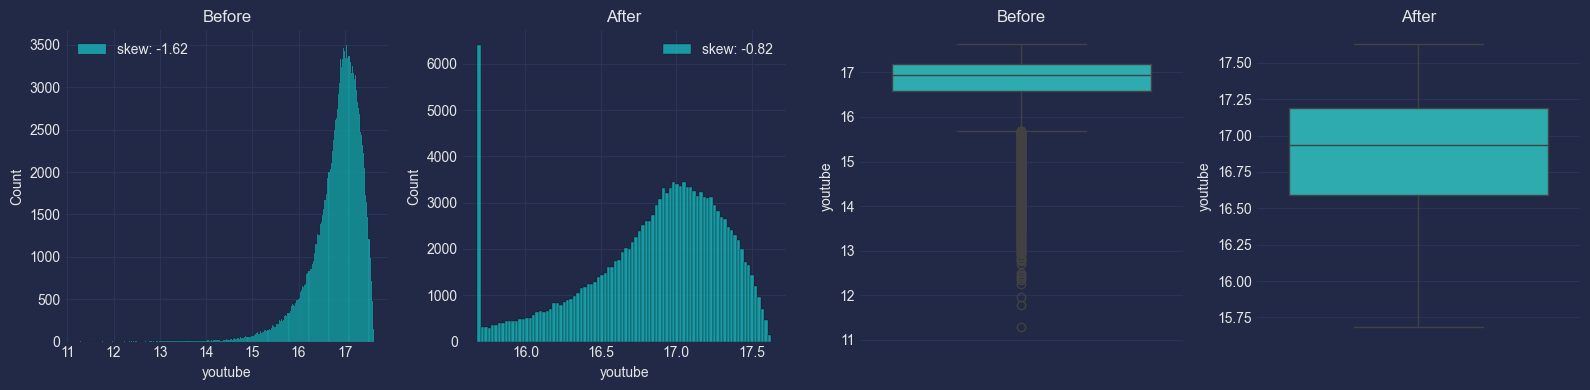

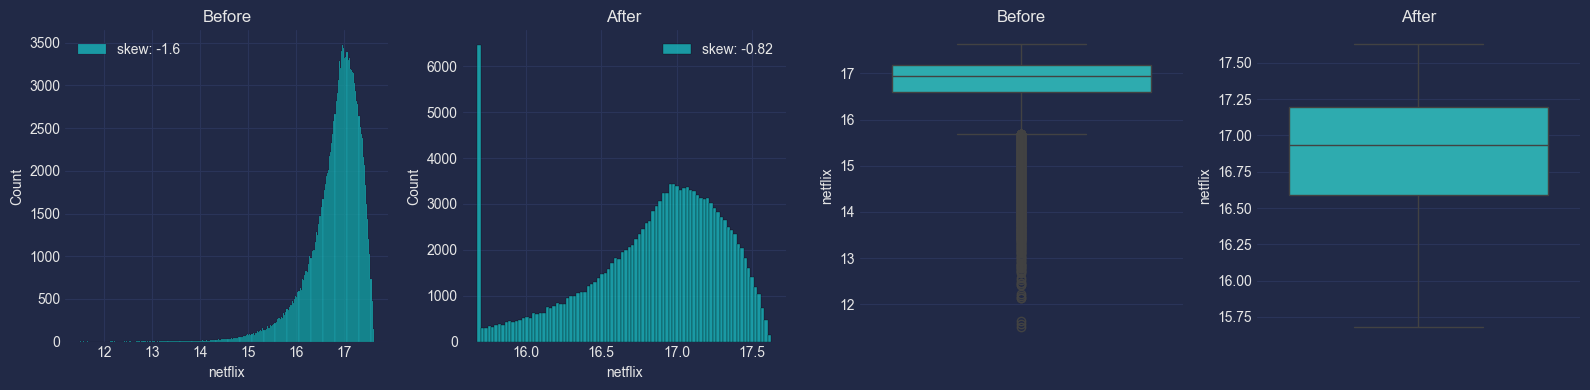

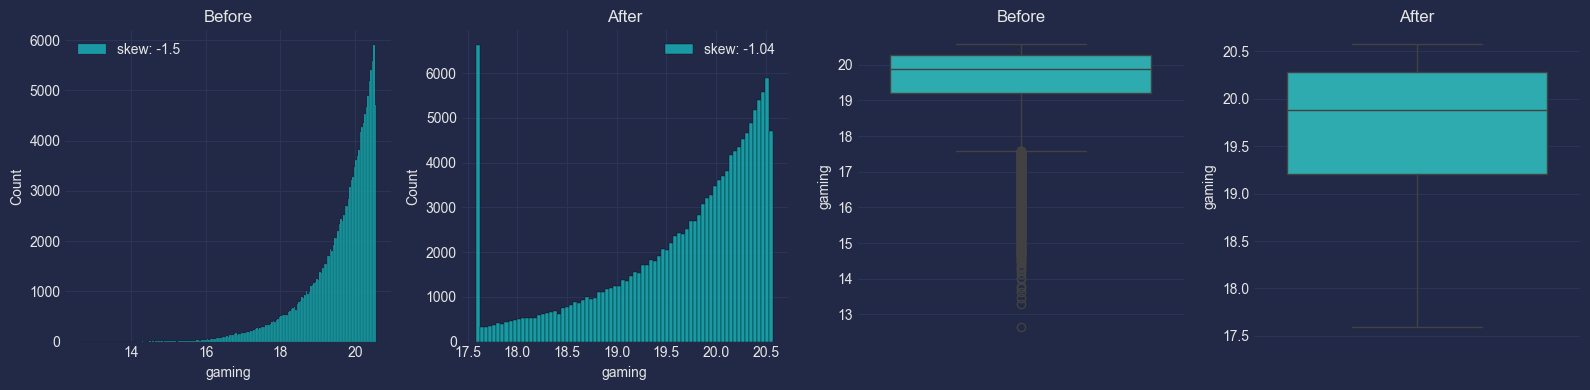

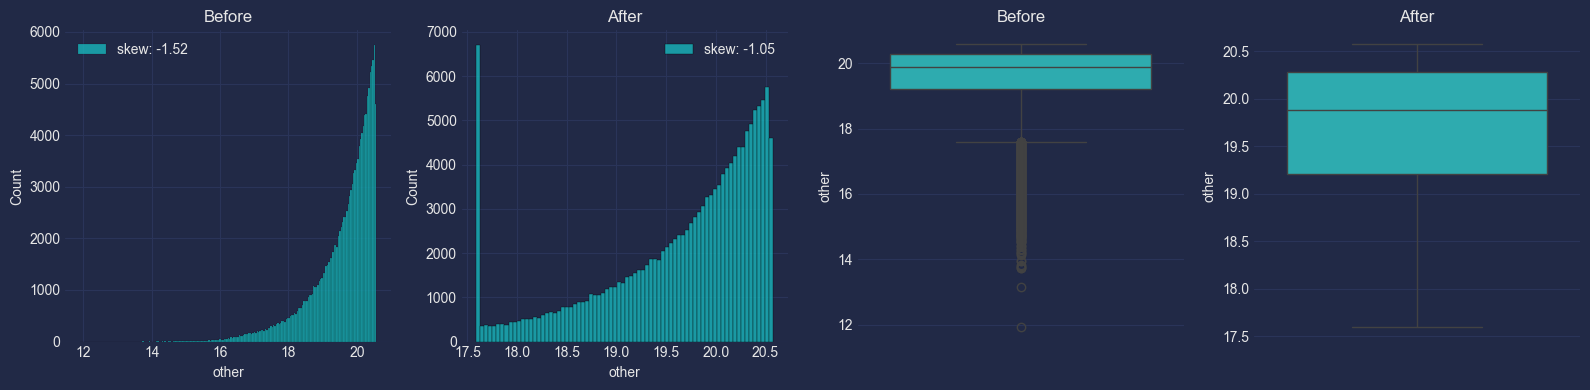

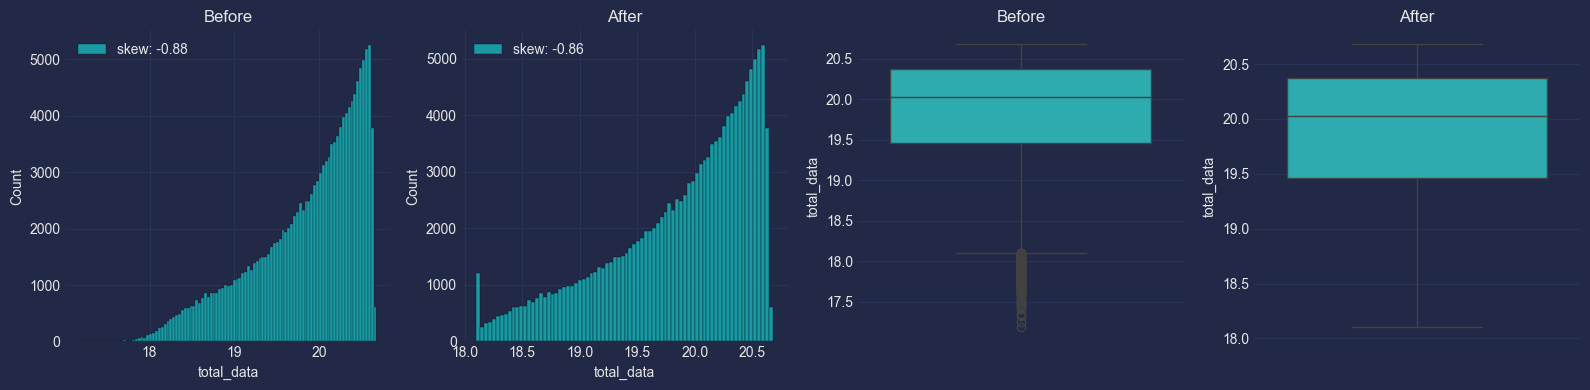

In [27]:
df = df_outlier.copy()
for col in columns_with_outliers:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.histplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.histplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [28]:
df_clean[numeric_columns] = df_caped[numeric_columns]

In [29]:
df_clean.to_csv('../data/outlier_data.csv', index=False)

In [31]:
df_clean.shape 

(150001, 63)